### Importación de Tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import csv
%matplotlib inline

### Importación de datos

In [ ]:
! git clone https://github.com/Duchanoy/BolsaDeValores.git

Cloning into 'BolsaDeValores'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 177.33 KiB | 1.71 MiB/s, done.


In [ ]:
!ls
%cd BolsaDeValores
!ls

BolsaDeValores	sample_data
/content/BolsaDeValores
hpq.us.txt  README.md


In [ ]:
date=[]
High=[]
Low=[]
with open('hpq.us.txt', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for i,row in enumerate(spamreader):
        if i == 0:
            print(row)
            print(len(row))
        else:
            date.append(row[0])

            High.append(float(row[2]))
            Low.append(float(row[3]))

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt']
7


In [ ]:
len(date)

12075

### verificando los datos de prueba

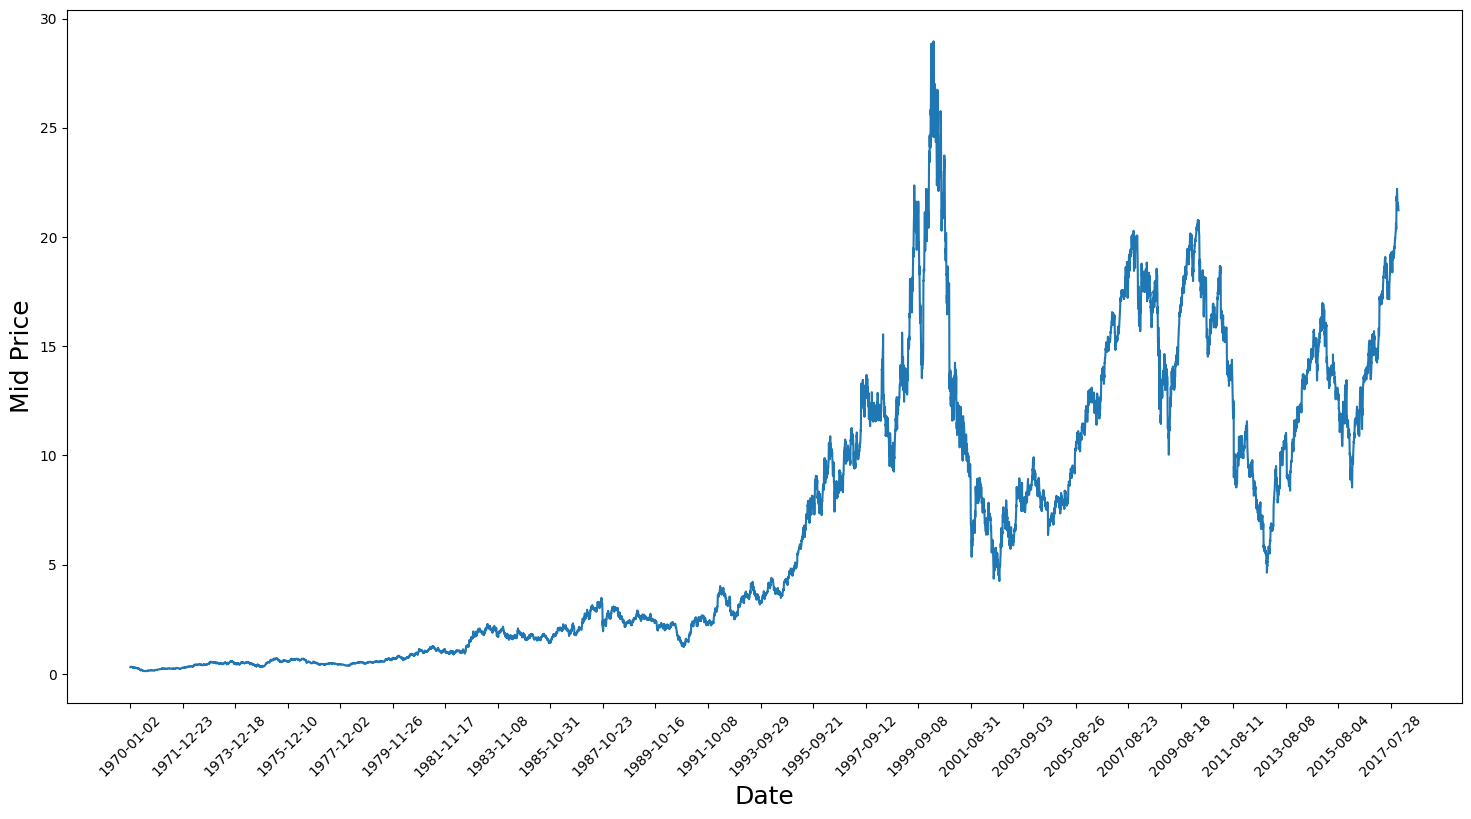

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(len(date)),(np.array(Low)+np.array(High))/2.0)
plt.xticks(range(0,len(date),500),date[0::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [ ]:
mid_prices = (np.array(Low)+np.array(High))/2.0

In [ ]:
Train_data = mid_prices[:11000]
Test_data = mid_prices

In [ ]:
def data_genertor(data, window , distance=0):
    x=[]
    y=[]
    for i in range(len(data)-window-distance):
        x.append(data[i:i+window])
        y.append(data[i+window+distance])
    return np.array(x),np.array(y)

In [ ]:
train_x,train_y=data_genertor(Train_data, 10 , 0)

In [ ]:
print(train_x.shape)
print(train_y.shape)

(10990, 10)
(10990,)


In [ ]:
test_x,test_y=data_genertor(Test_data, 10 , 0)

In [ ]:
print(test_x.shape)
print(test_y.shape)

(12065, 10)
(12065,)


### Declarando la arquitectura

Generando función

In [ ]:
#NOTEN QUE PARA HACER USO DE LOS ESTADOS REQUERIMOS USAR UN MODELO NO SECUENCIAL DE KERAS
#ESTE MODO DE USAR KERAS NOS PERMITE HACER ARQUITECTURAS CON MAYOR FELIXIBILIDAD, PARECIDO A TF2

#Lo primero que debemos declarar es la forma que tendrá cada una de nuestras secuencias de entrada
#Esto lo hacemos con la capa Input de Keras
input = tf.keras.layers.Input(shape=(10,1))
#units es la dimensionalidad del espacio de salida
#Ahora, declaramos la LSTM, noten que además de indicar el tamaño de las unidades (qué ahora son 10 en vez de 1), estamos agregando
#el argumento 'return_state=True', esto nos permite obtener como salida:
# + la proyección (output),
# + la memoria a corto plazo (state_h), state_h y output son el mismo dato
# + la memoria a largo plazo/memoria carry (state_c)

#Esta capa nos regresa tres datos, y necesitamos indicarle al Keras no secuencial con qué cosa vamos a conectar esta capa, por ello,
#después de declarar la capa de agrega '(input)' diciendole que esa será la entrada a esta capa
output, state_h, state_c  = tf.keras.layers.LSTM(units=10,activation="LeakyReLU" , return_state=True)(input)

# Para declarar el modelo de keras no secuencial, debemos guardarlo en una variable tf.keras.Model, donde le indicamos qué recibe como entrada
# y qué debe entregar como salida. Noten que en este caso, nuestra entrada es 'input', nuestra ventada de 10 datos, y la salida es una lista que contiene
# los tres datos que nos entrega la LSTM
model = tf.keras.Model(input, [output,state_h,state_c])
model.summary()
# ¿y si quiero conectarle mas capas?
# ¿De dónde salen los 480 parametros?
# 40 pesos sinápticos
# 40 bias
# 40 funciones de activacion

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm (LSTM)                 [(None, 10),              480       
                              (None, 10),                        
                              (None, 10)]                        
                                                                 
Total params: 480 (1.88 KB)
Trainable params: 480 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Le damos a nuestras secuencias la forma adecuada para entrenar
#Procurando que sea:  [numero de ejemplos, datos por secuencia (pasos de tiempo), numero de rasgos/canales de entrada]
train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1],1))
test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1],1))

model.fit(train_x,train_y,
                epochs=100,
                batch_size=100,
                shuffle=False
                )

Epoch 1/100
110/110 [==============================] - 8s 17ms/step - loss: 96.0067 - lstm_loss: 33.7778 - lstm_1_loss: 33.7778 - lstm_2_loss: 28.4511
Epoch 2/100
110/110 [==============================] - 2s 17ms/step - loss: 66.5299 - lstm_loss: 23.0735 - lstm_1_loss: 23.0735 - lstm_2_loss: 20.3829
Epoch 3/100
110/110 [==============================] - 2s 17ms/step - loss: 34.9245 - lstm_loss: 11.5557 - lstm_1_loss: 11.5557 - lstm_2_loss: 11.8130
Epoch 4/100
110/110 [==============================] - 3s 24ms/step - loss: 14.3624 - lstm_loss: 4.7085 - lstm_1_loss: 4.7085 - lstm_2_loss: 4.9454
Epoch 5/100
110/110 [==============================] - 3s 26ms/step - loss: 6.1878 - lstm_loss: 2.1094 - lstm_1_loss: 2.1094 - lstm_2_loss: 1.9690
Epoch 6/100
110/110 [==============================] - 2s 17ms/step - loss: 7.1682 - lstm_loss: 2.4290 - lstm_1_loss: 2.4290 - lstm_2_loss: 2.3101
Epoch 7/100
110/110 [==============================] - 2s 16ms/step - loss: 7.3027 - lstm_loss: 2.4536 - 

## función de prueba

In [ ]:
Salidas = model.predict(test_x,verbose=True)

378/378 [==============================] - 1s 3ms/step


In [ ]:
print("len(Salidas)",len(Salidas))
print("print(len(Salidas[0]))",len(Salidas[0]))
print("print(len(Salidas[0][0]))",len(Salidas[0][0]))
print("print(len(Salidas[1]))",len(Salidas[0]))
print("print(len(Salidas[1][0]))",len(Salidas[1][0]))
print("print(len(Salidas[2]))",len(Salidas[0]))
print("print(len(Salidas[2][0]))",len(Salidas[1][0]))


len(Salidas) 3
print(len(Salidas[0])) 12065
print(len(Salidas[0][0])) 10
print(len(Salidas[1])) 12065
print(len(Salidas[1][0])) 10
print(len(Salidas[2])) 12065
print(len(Salidas[2][0])) 10


In [ ]:
proyecciones= []
for s in Salidas[0]:
  proyecciones.append(s[7])

**************************************************************************************************************************************************************
            Predicciones No. 0
**************************************************************************************************************************************************************


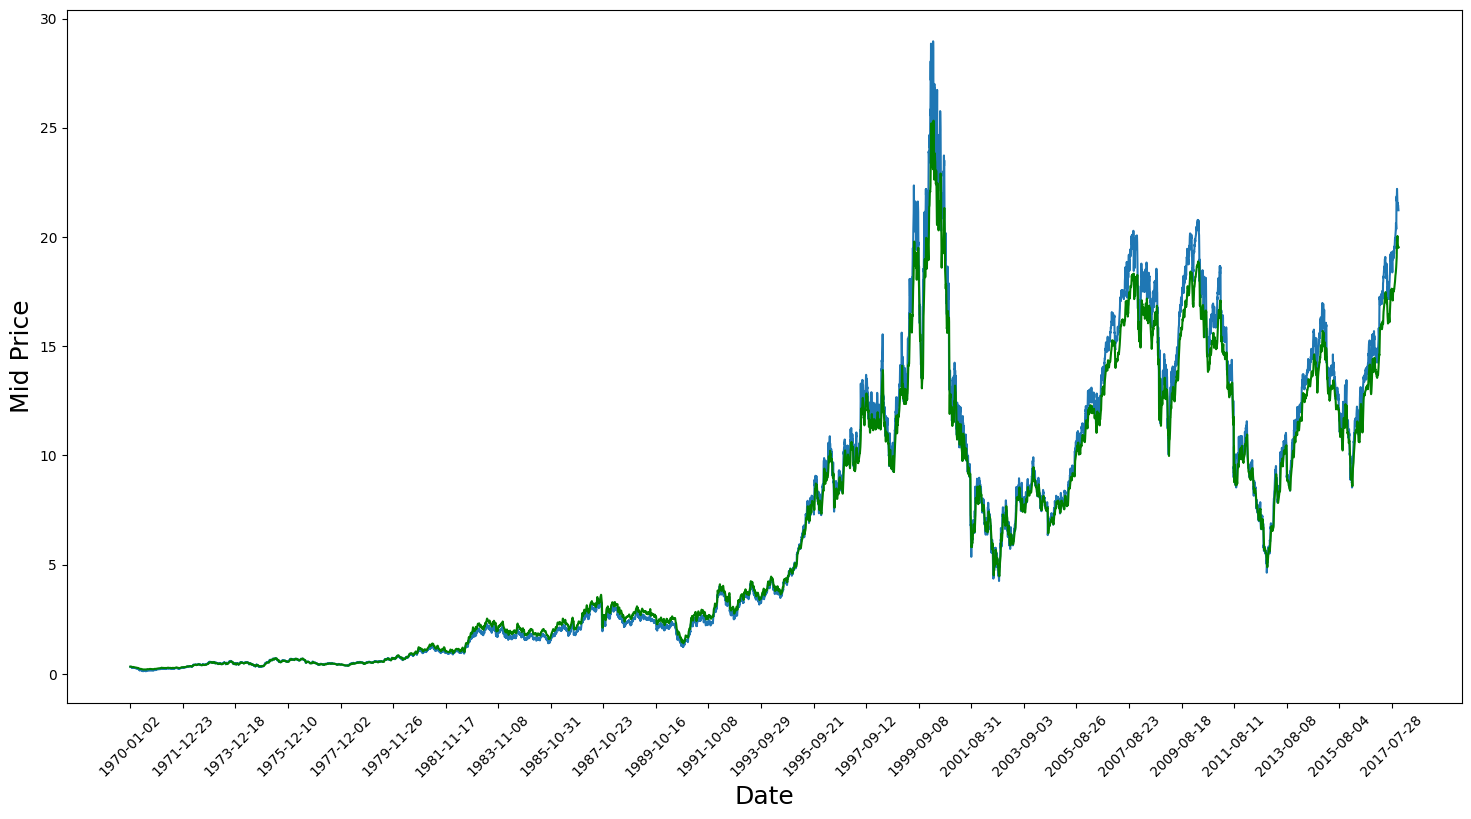

**************************************************************************************************************************************************************
            Predicciones No. 1
**************************************************************************************************************************************************************


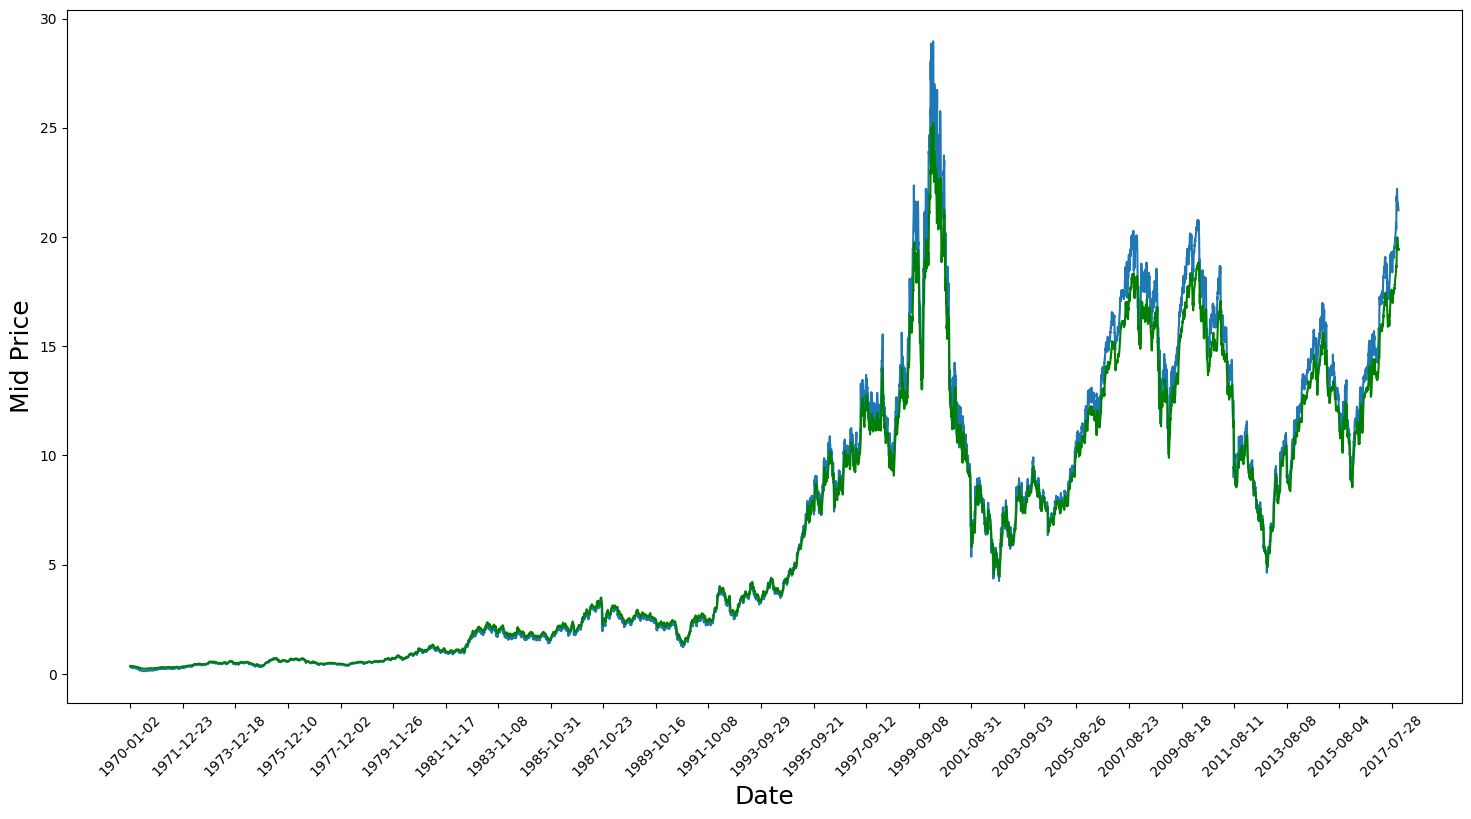

**************************************************************************************************************************************************************
            Predicciones No. 2
**************************************************************************************************************************************************************


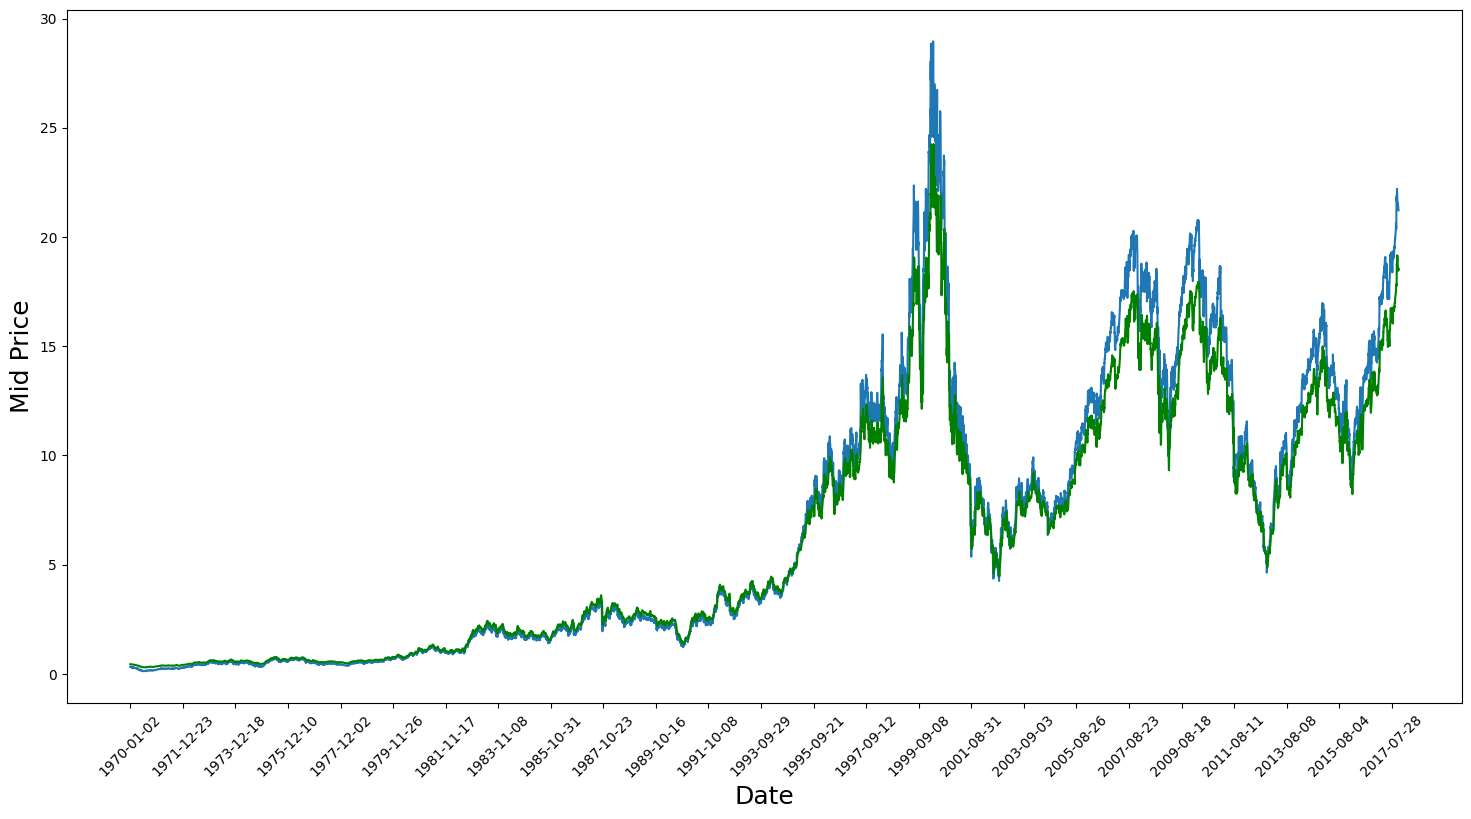

**************************************************************************************************************************************************************
            Predicciones No. 3
**************************************************************************************************************************************************************


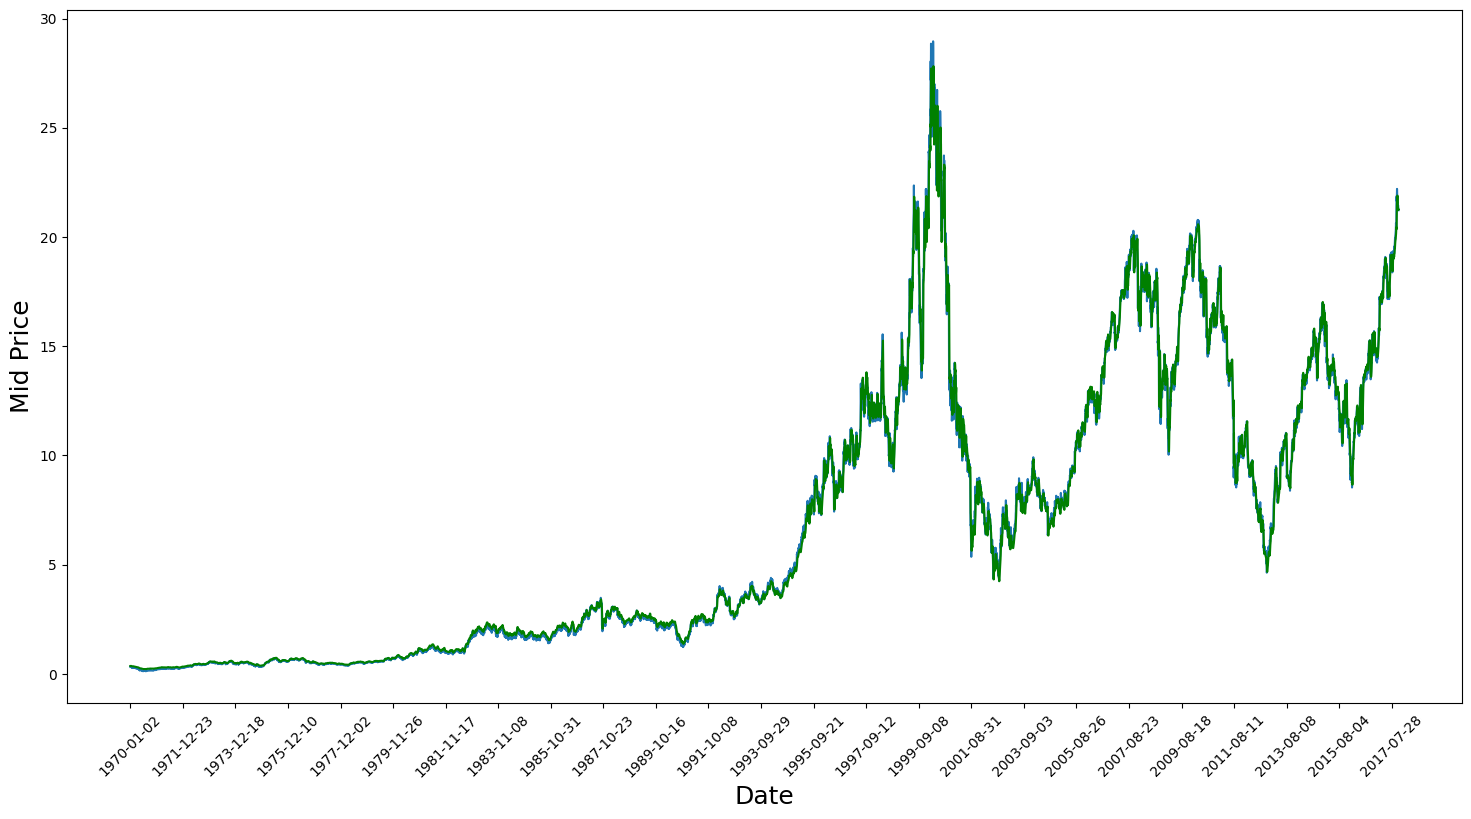

**************************************************************************************************************************************************************
            Predicciones No. 4
**************************************************************************************************************************************************************


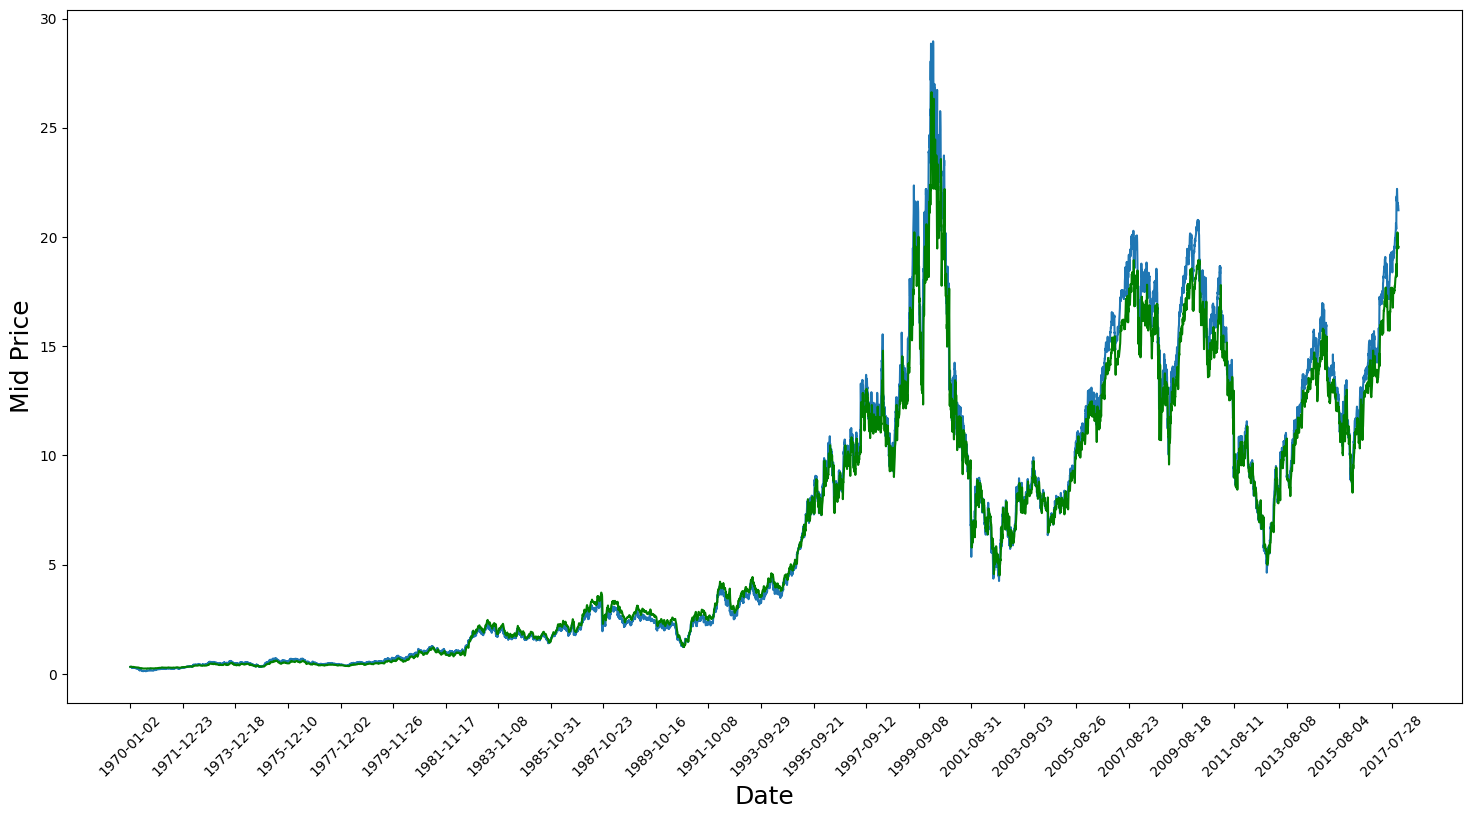

**************************************************************************************************************************************************************
            Predicciones No. 5
**************************************************************************************************************************************************************


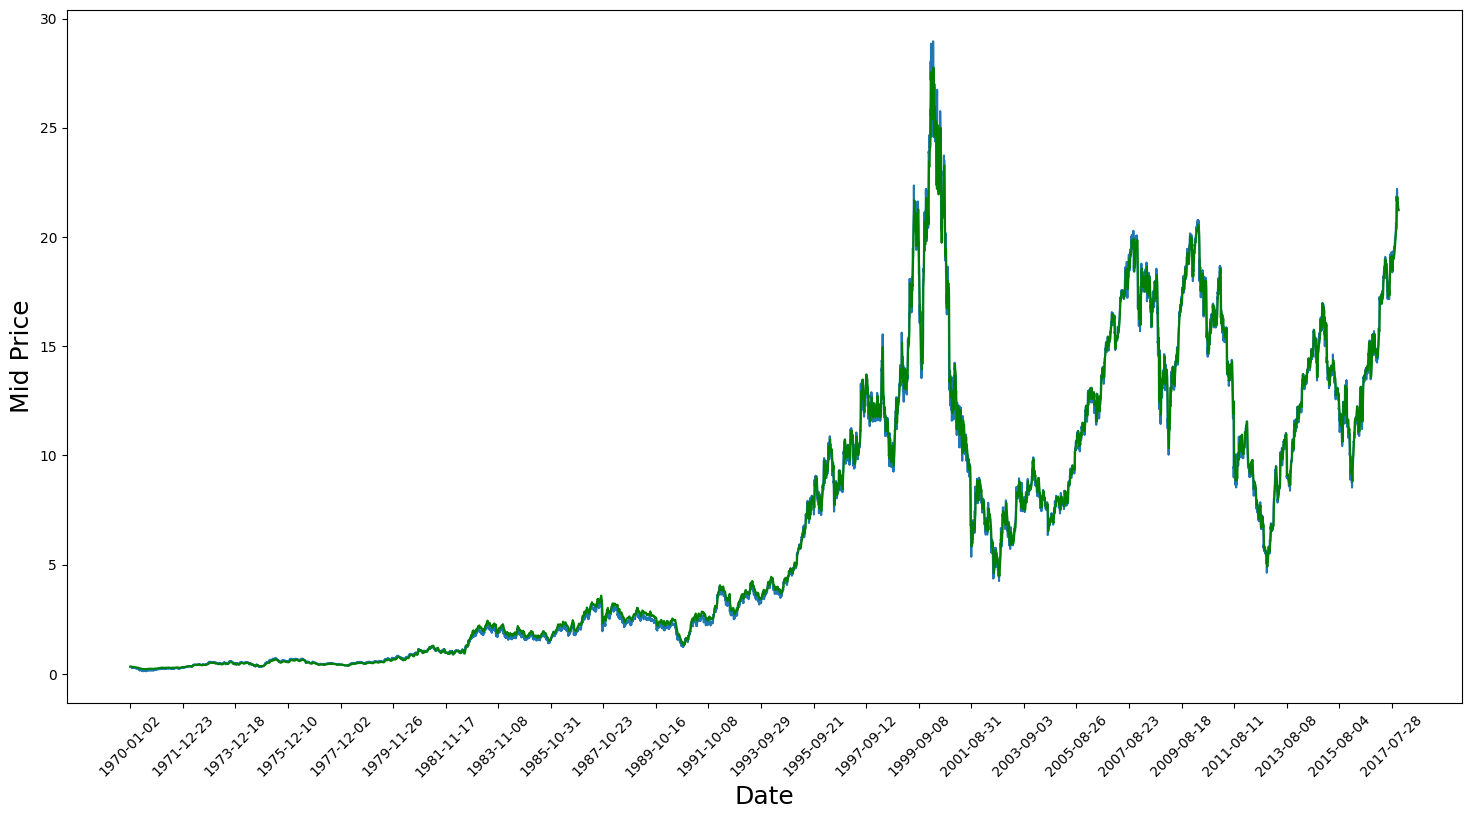

**************************************************************************************************************************************************************
            Predicciones No. 6
**************************************************************************************************************************************************************


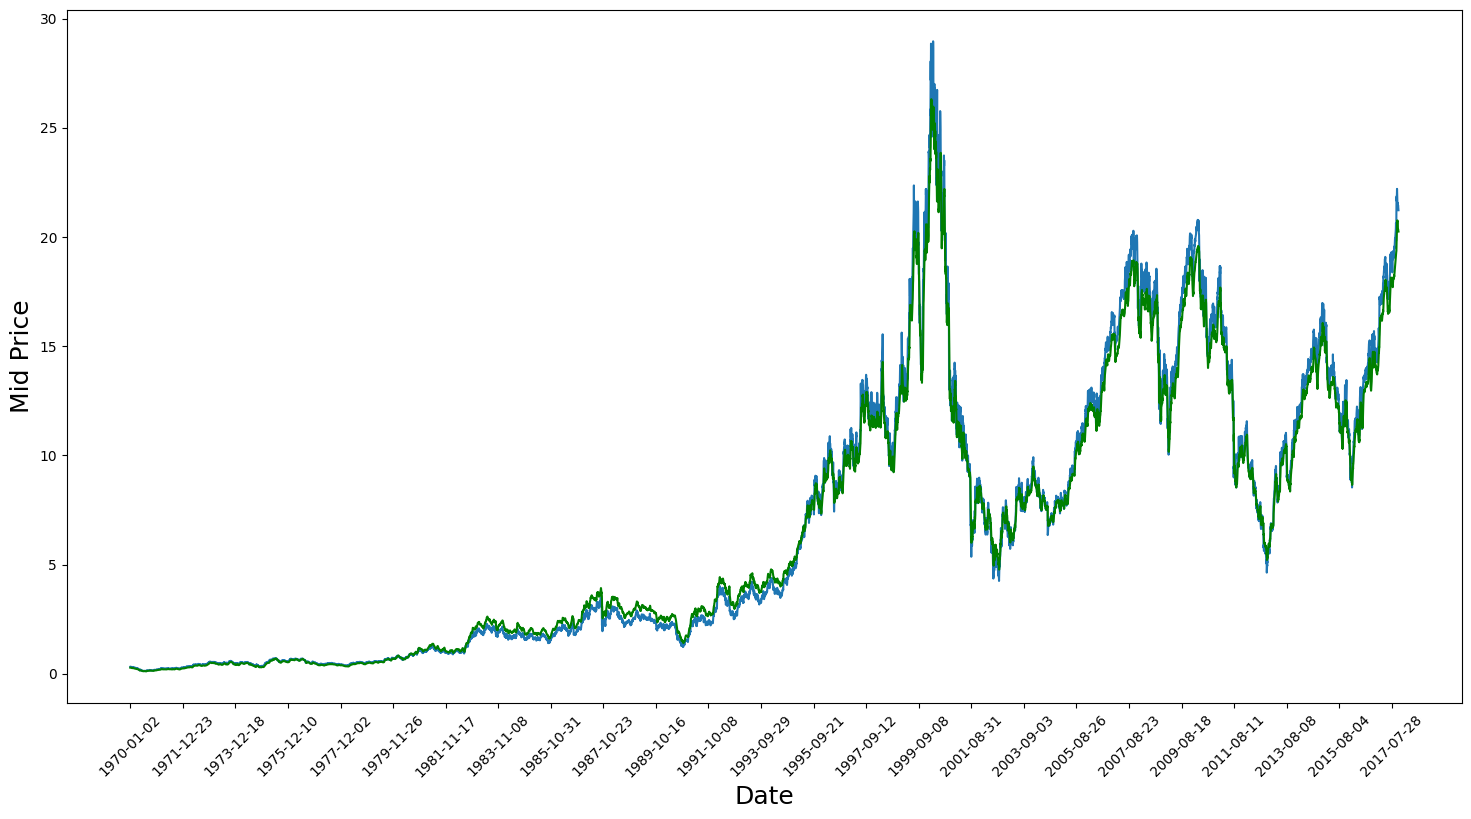

**************************************************************************************************************************************************************
            Predicciones No. 7
**************************************************************************************************************************************************************


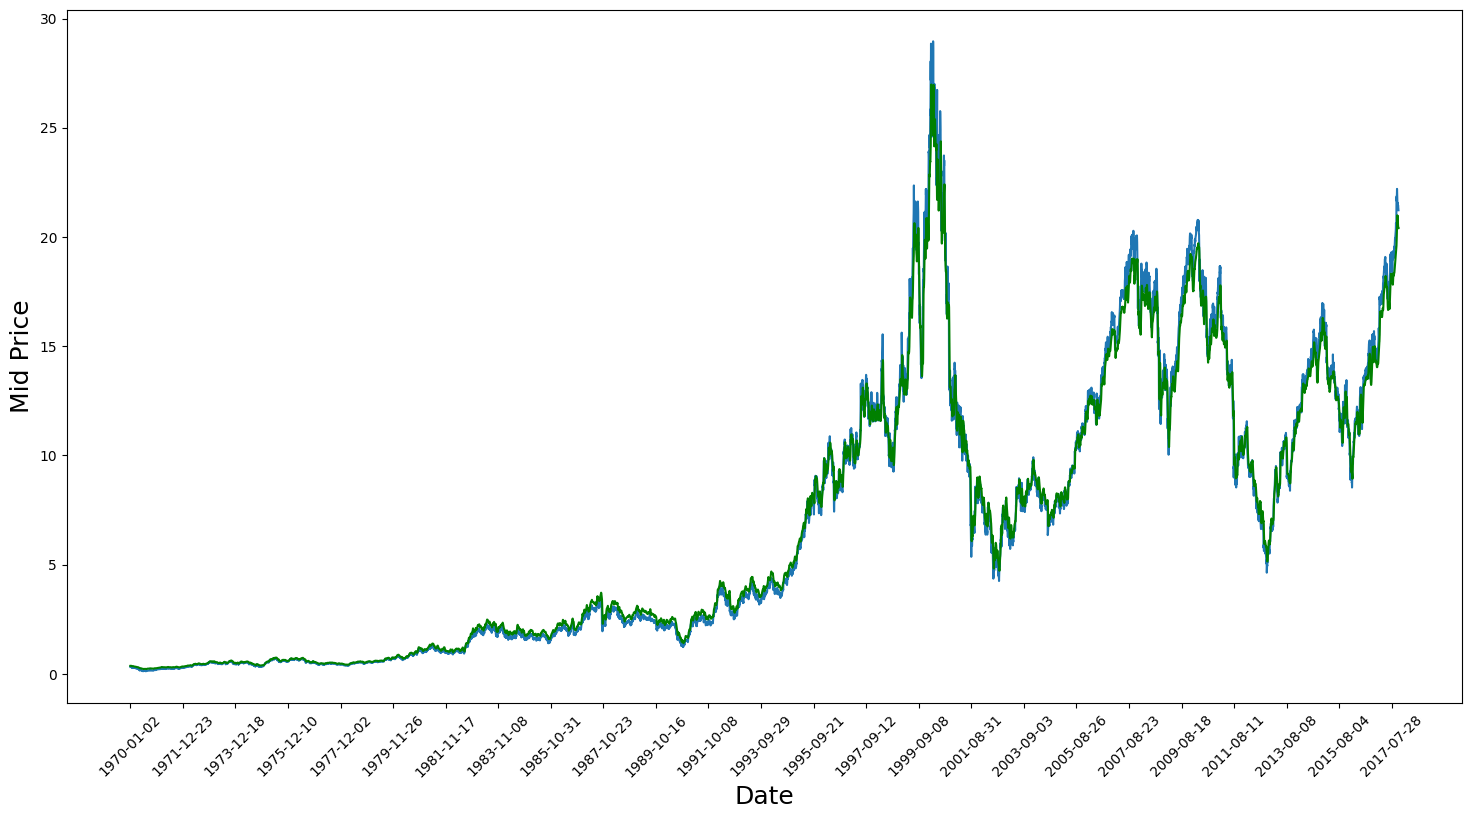

**************************************************************************************************************************************************************
            Predicciones No. 8
**************************************************************************************************************************************************************


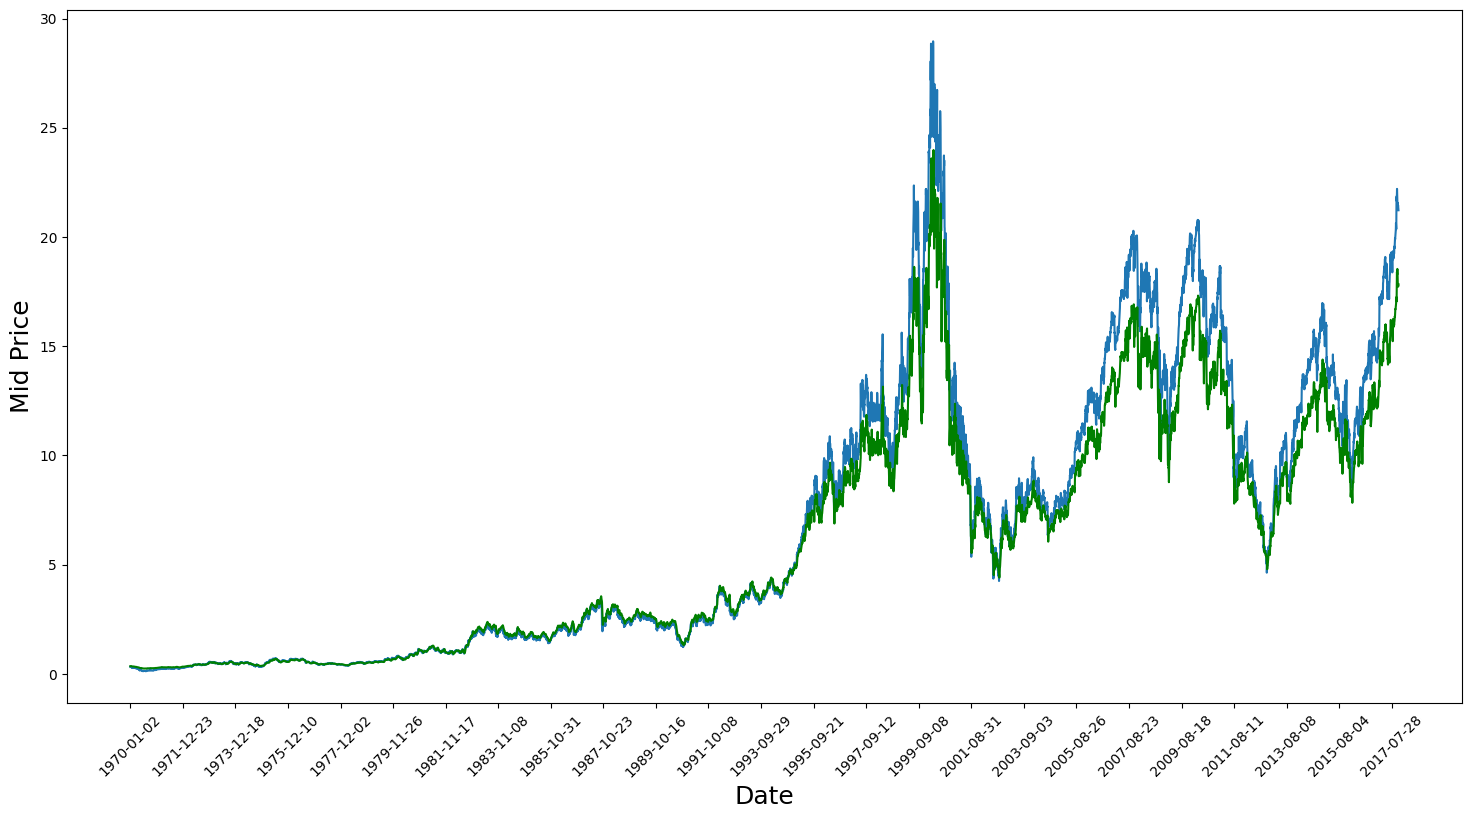

**************************************************************************************************************************************************************
            Predicciones No. 9
**************************************************************************************************************************************************************


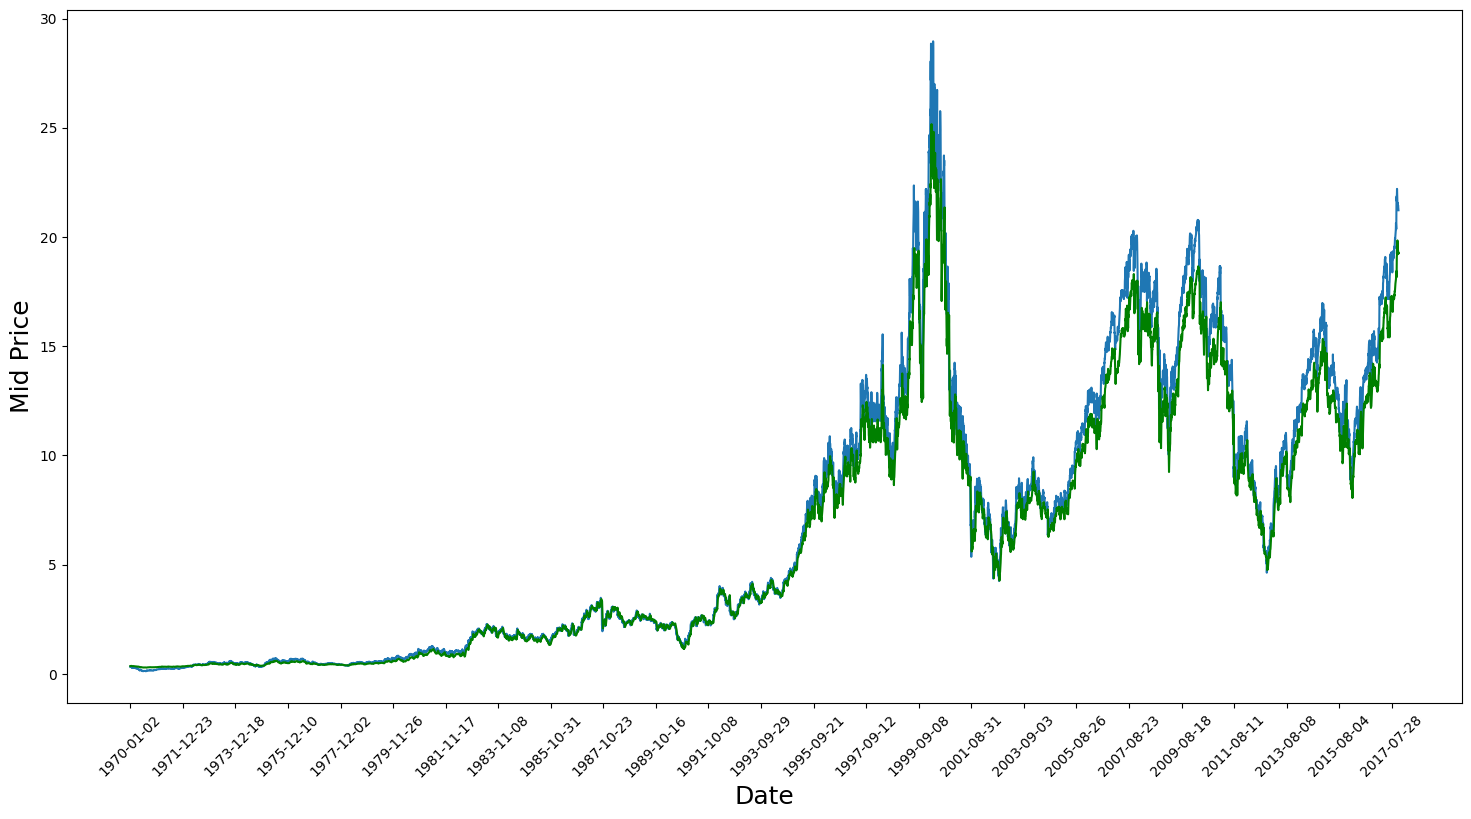

In [ ]:
i=0
while i<len(Salidas[0][0]):
  print("**************************************************************************************************************************************************************")
  print("            Predicciones No.", i)
  print("**************************************************************************************************************************************************************")
  proyecciones= []
  for s in Salidas[0]:
    proyecciones.append(s[i])

  plt.figure(figsize = (18,9))
  plt.plot(range(len(date[10:])),mid_prices[10:])
  plt.plot(range(len(date[10:])),proyecciones,color="green")
  plt.xticks(range(0,len(date),500),date[0::500],rotation=45)
  plt.xlabel('Date',fontsize=18)
  plt.ylabel('Mid Price',fontsize=18)
  plt.show()
  i+=1

**************************************************************************************************************************************************************
            Estado oculto No. 0
**************************************************************************************************************************************************************


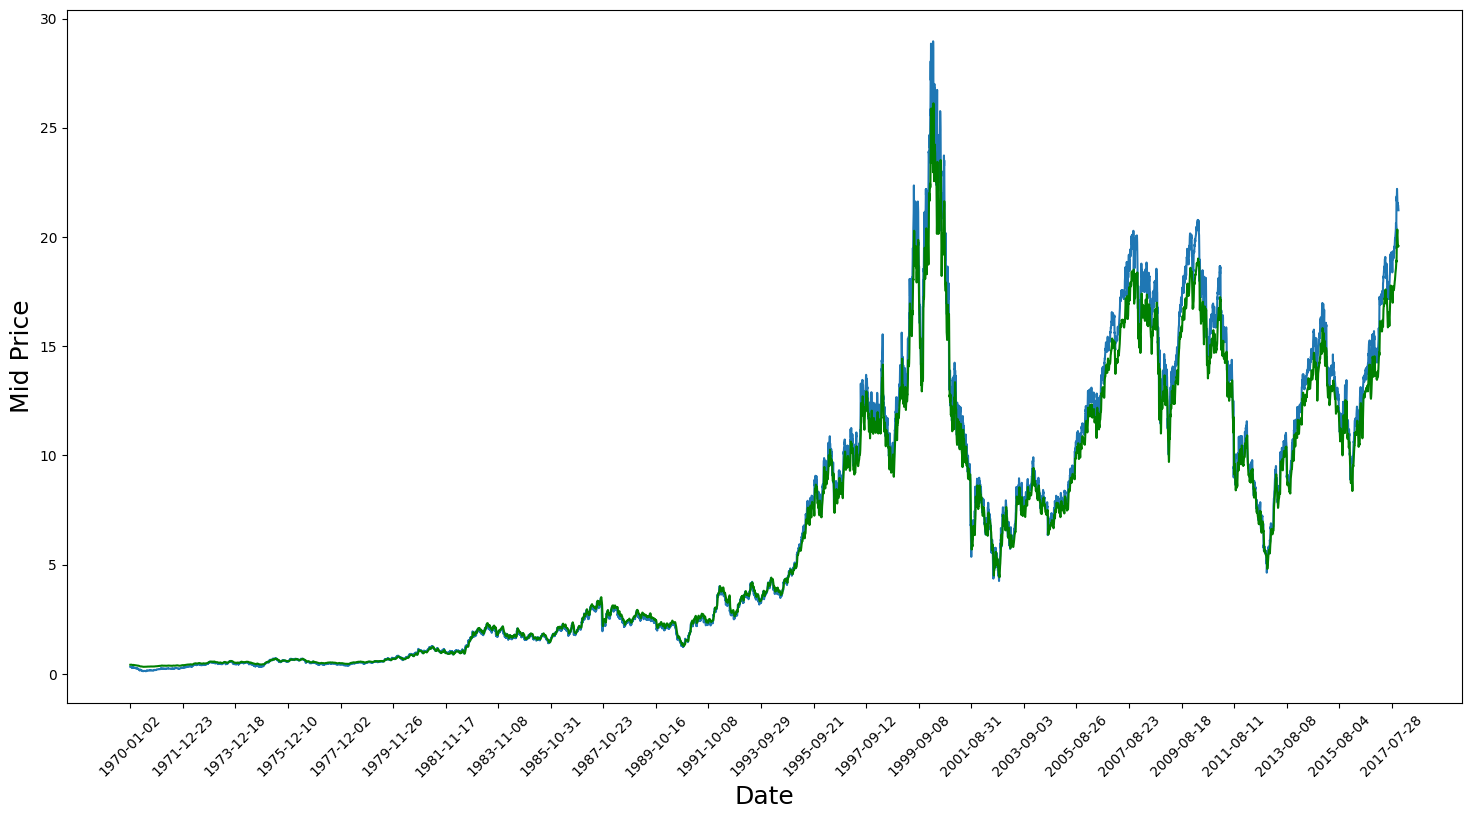

**************************************************************************************************************************************************************
            Estado oculto No. 1
**************************************************************************************************************************************************************


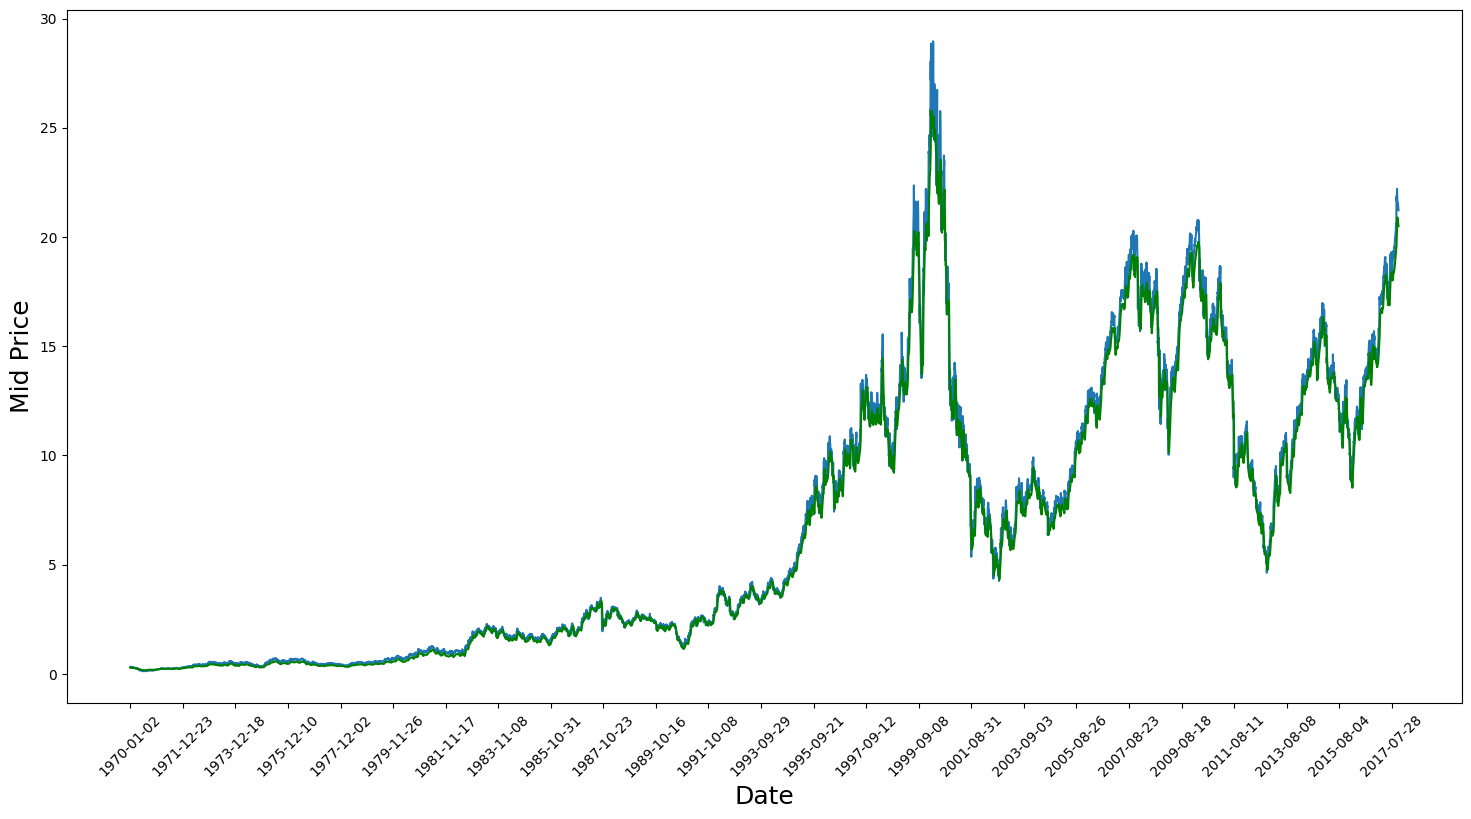

**************************************************************************************************************************************************************
            Estado oculto No. 2
**************************************************************************************************************************************************************


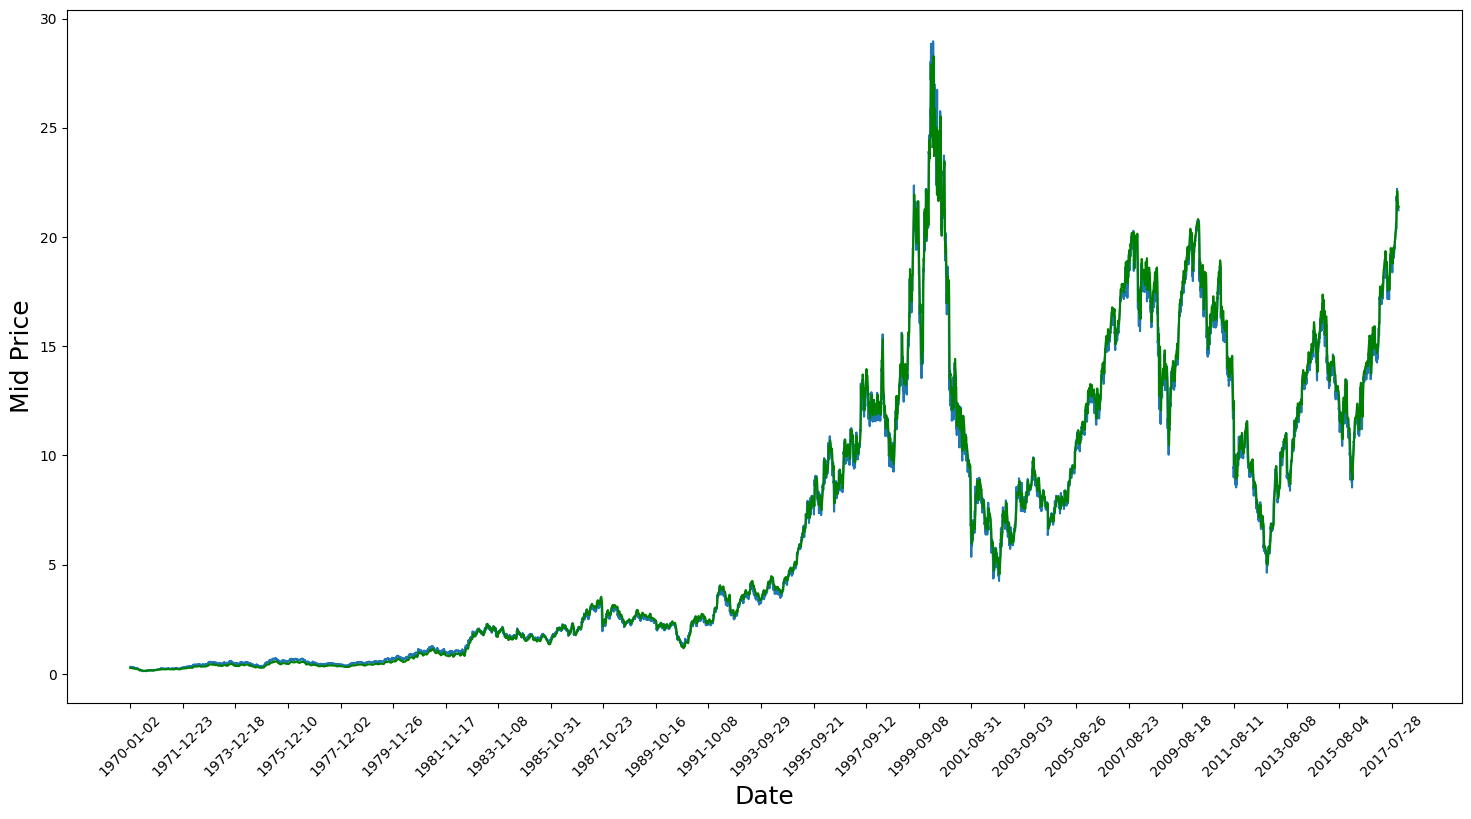

**************************************************************************************************************************************************************
            Estado oculto No. 3
**************************************************************************************************************************************************************


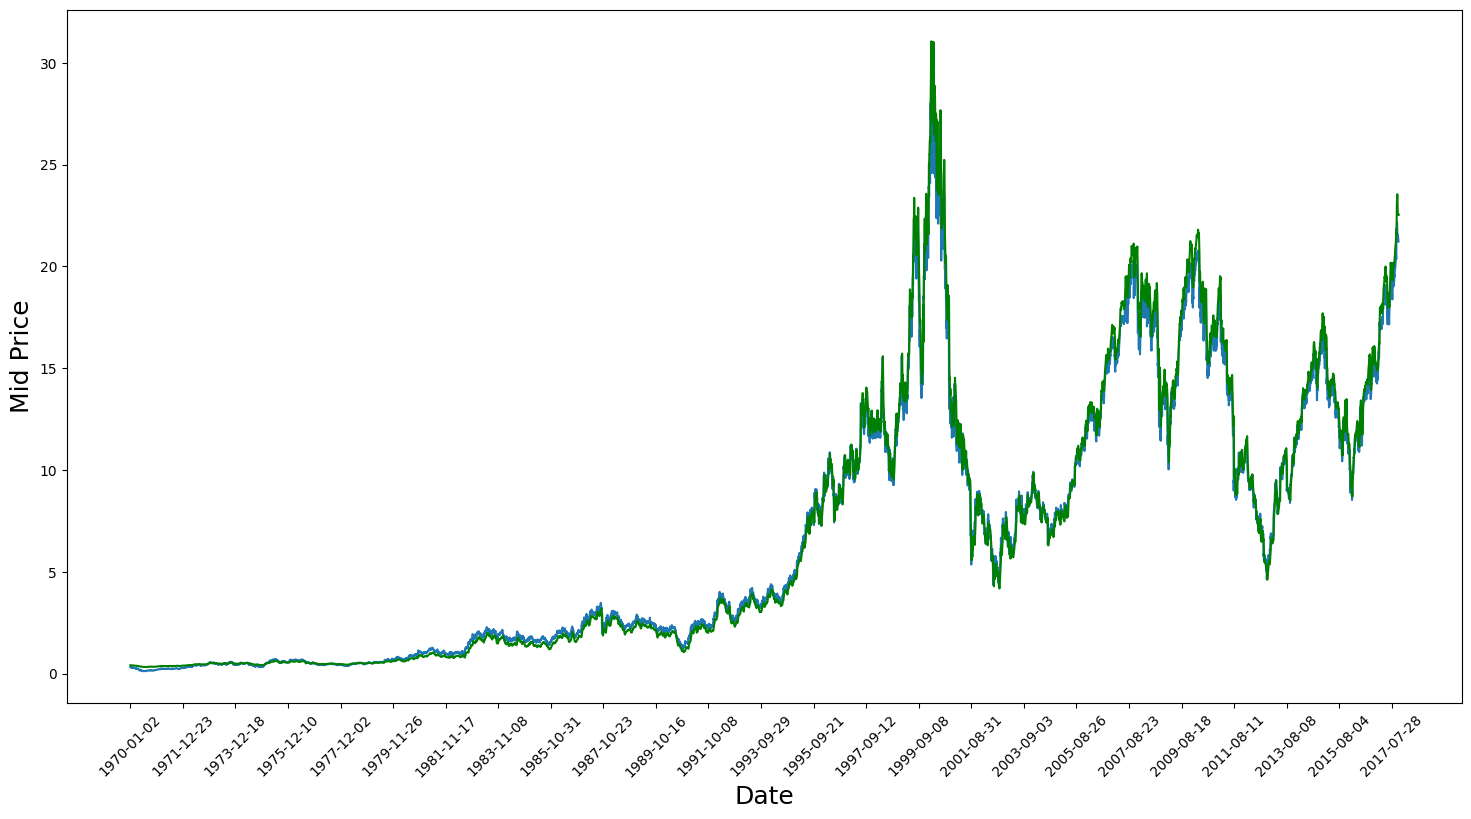

**************************************************************************************************************************************************************
            Estado oculto No. 4
**************************************************************************************************************************************************************


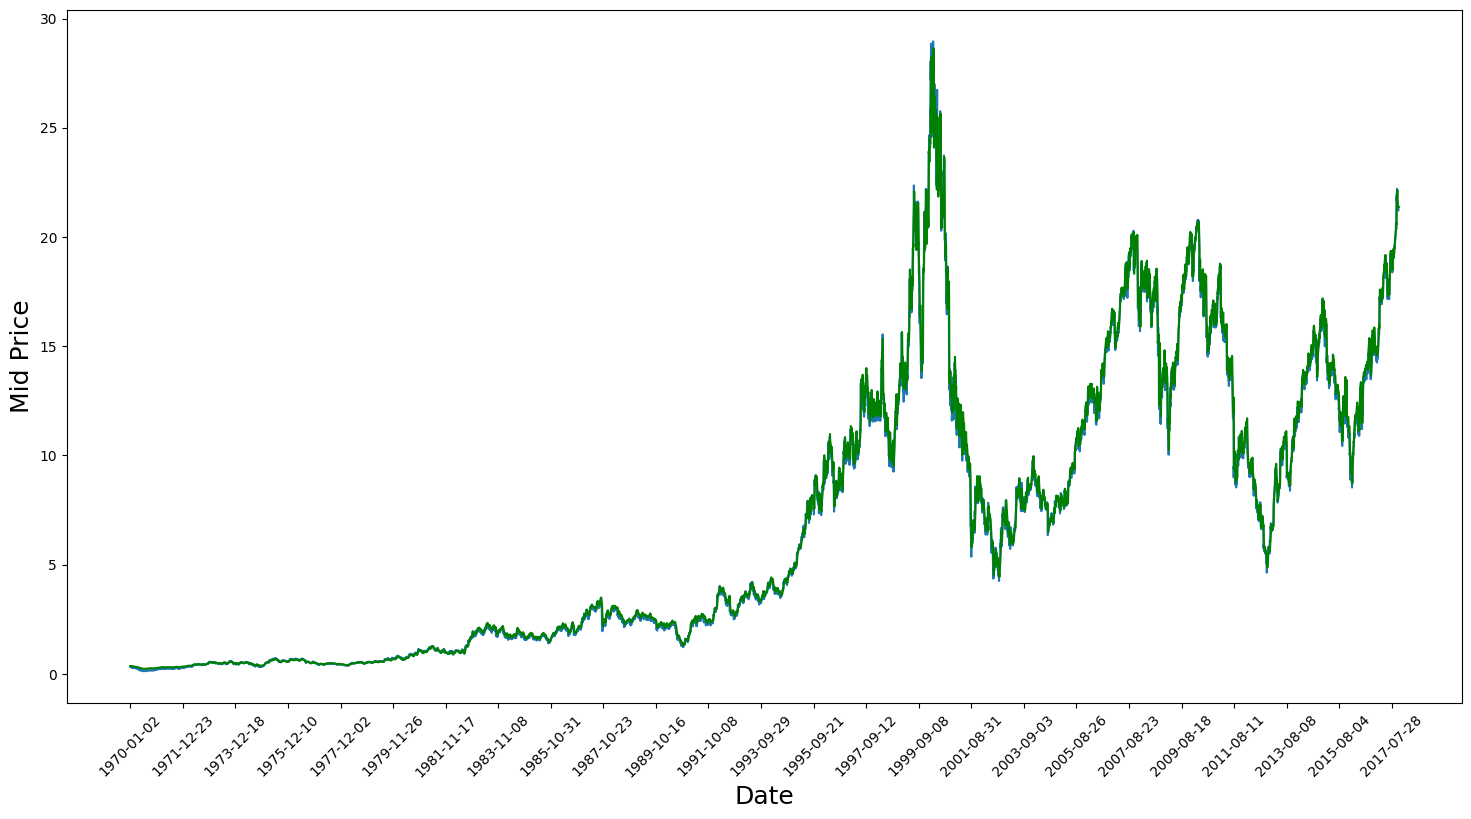

**************************************************************************************************************************************************************
            Estado oculto No. 5
**************************************************************************************************************************************************************


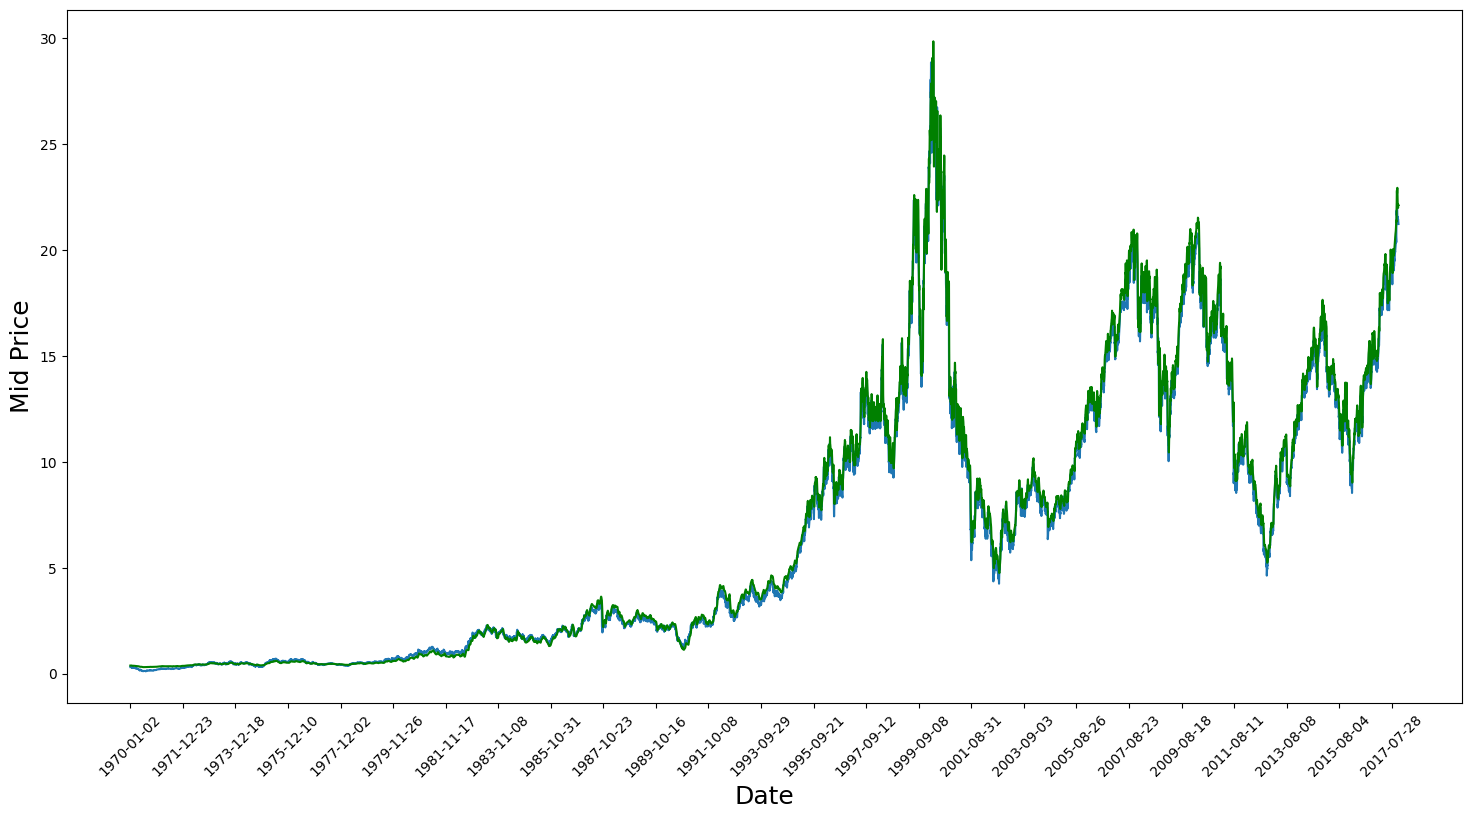

**************************************************************************************************************************************************************
            Estado oculto No. 6
**************************************************************************************************************************************************************


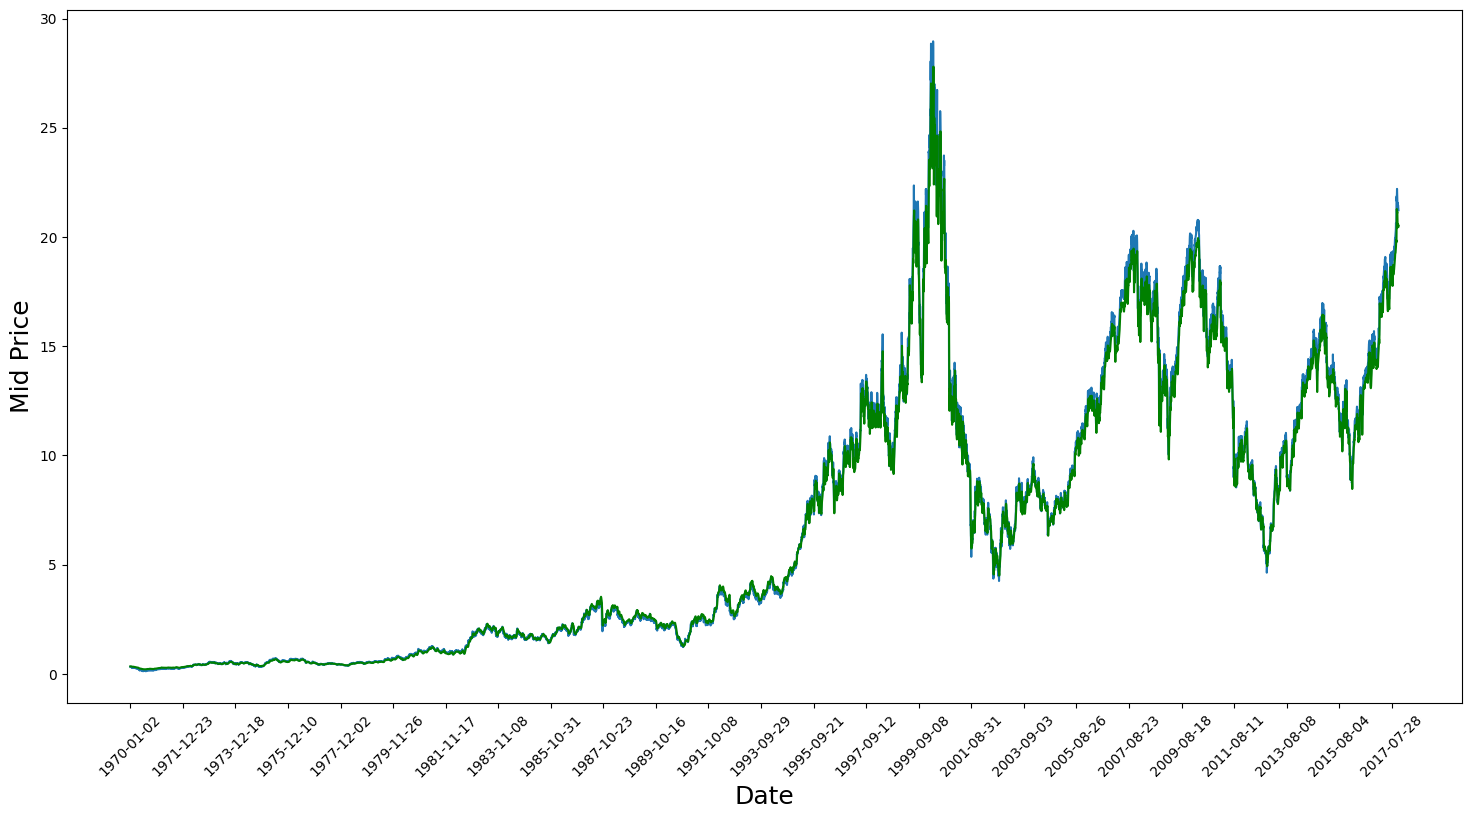

**************************************************************************************************************************************************************
            Estado oculto No. 7
**************************************************************************************************************************************************************


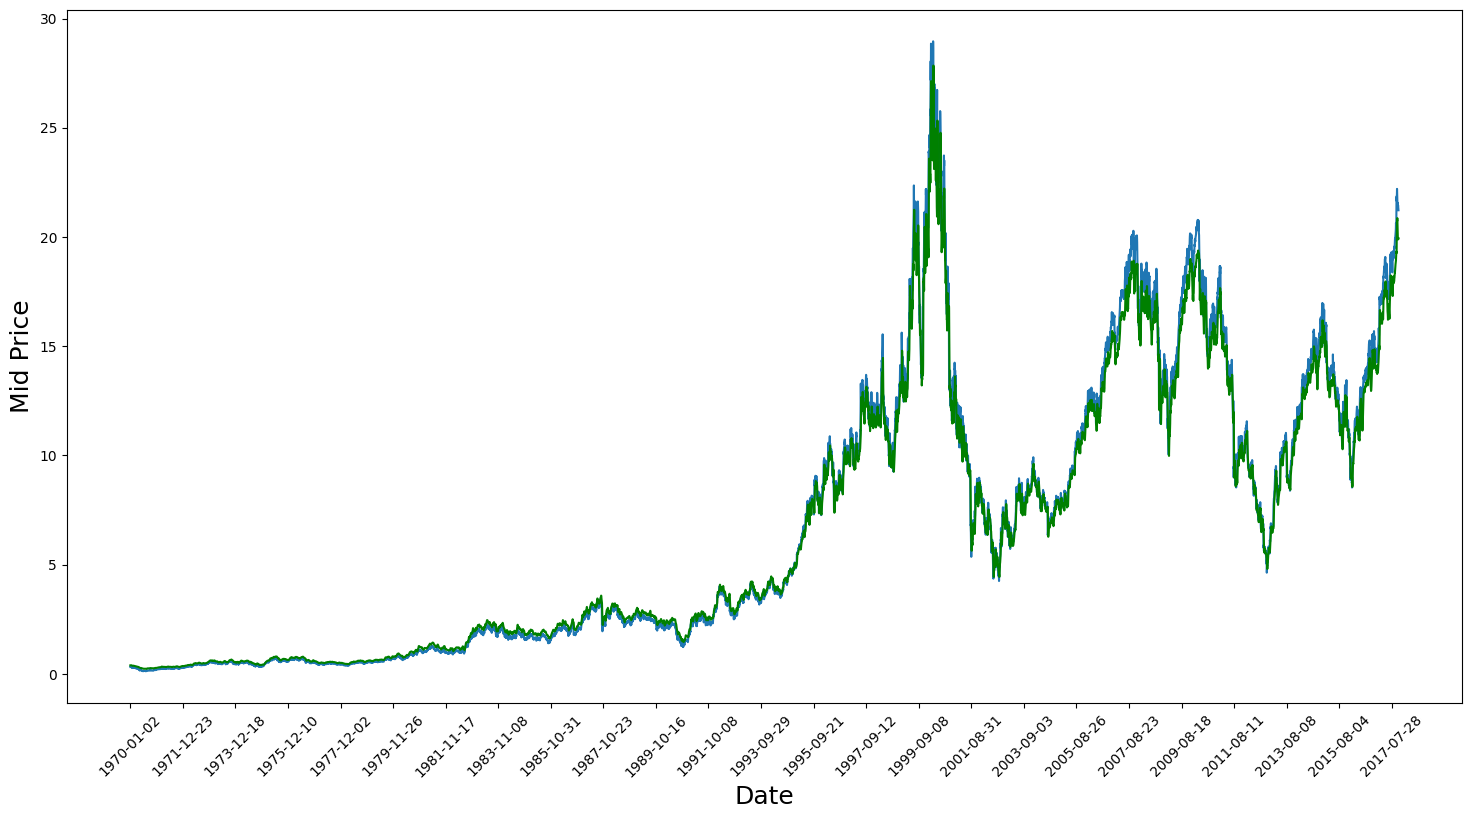

**************************************************************************************************************************************************************
            Estado oculto No. 8
**************************************************************************************************************************************************************


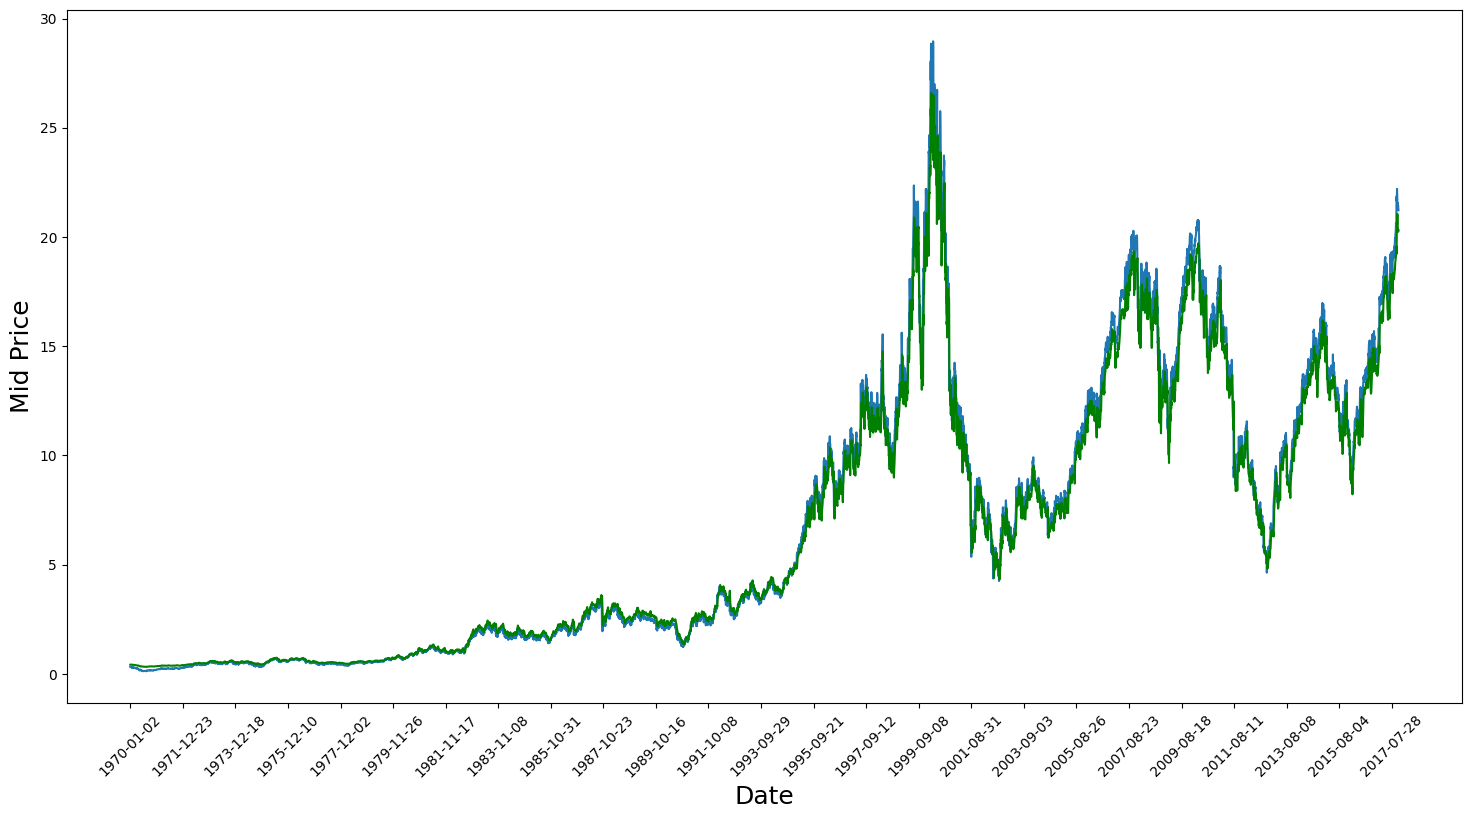

**************************************************************************************************************************************************************
            Estado oculto No. 9
**************************************************************************************************************************************************************


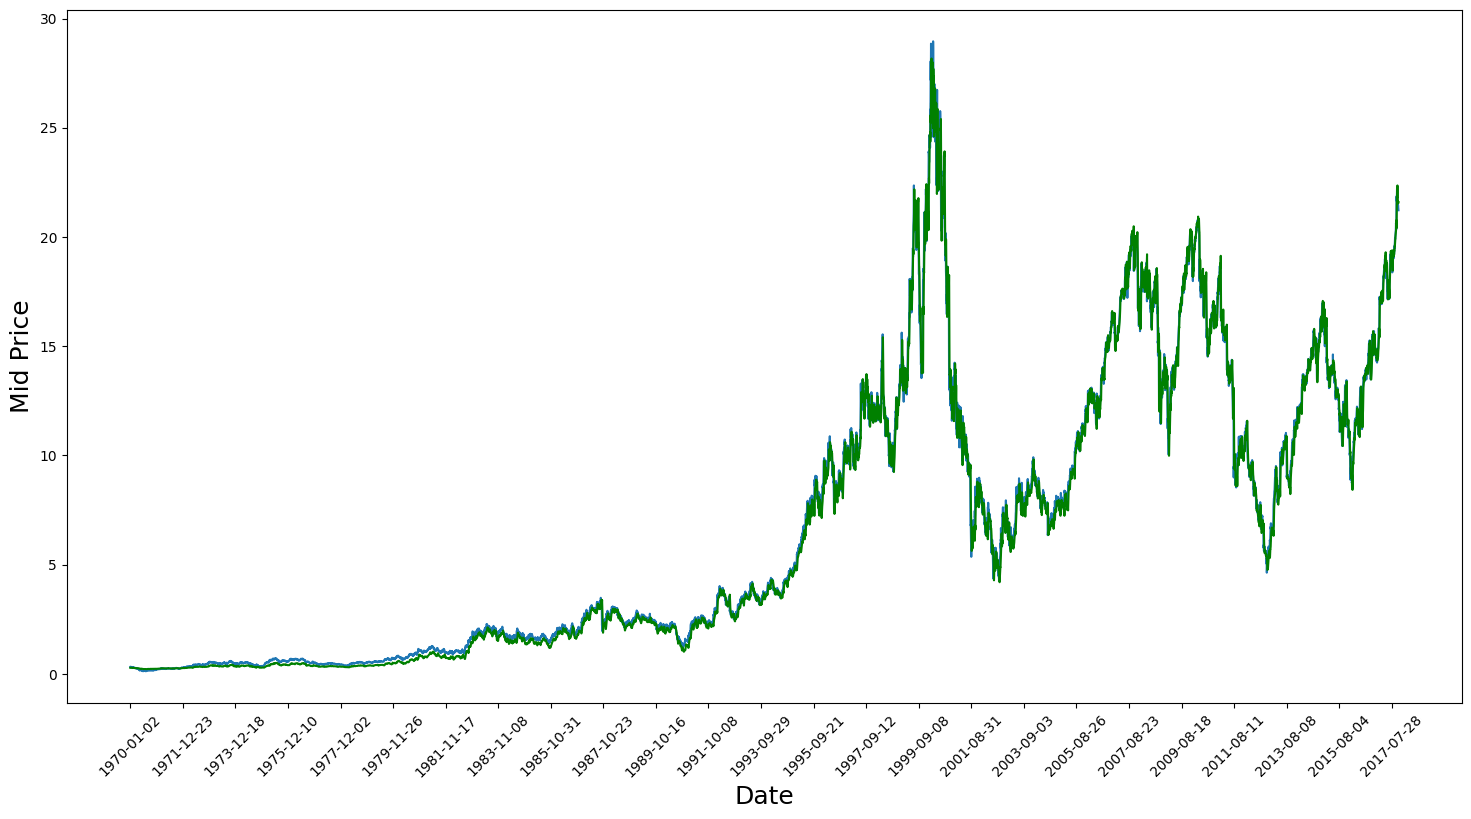

In [ ]:
i=0
while i<len(Salidas[1][0]):
  print("**************************************************************************************************************************************************************")
  print("            Estado oculto No.", i)
  print("**************************************************************************************************************************************************************")
  proyecciones= []
  for s in Salidas[1]:
    proyecciones.append(s[i])

  plt.figure(figsize = (18,9))
  plt.plot(range(len(date[10:])),mid_prices[10:])
  plt.plot(range(len(date[10:])),proyecciones,color="green")
  plt.xticks(range(0,len(date),500),date[0::500],rotation=45)
  plt.xlabel('Date',fontsize=18)
  plt.ylabel('Mid Price',fontsize=18)
  plt.show()
  i+=1

**************************************************************************************************************************************************************
            Estado carry No. 0
**************************************************************************************************************************************************************


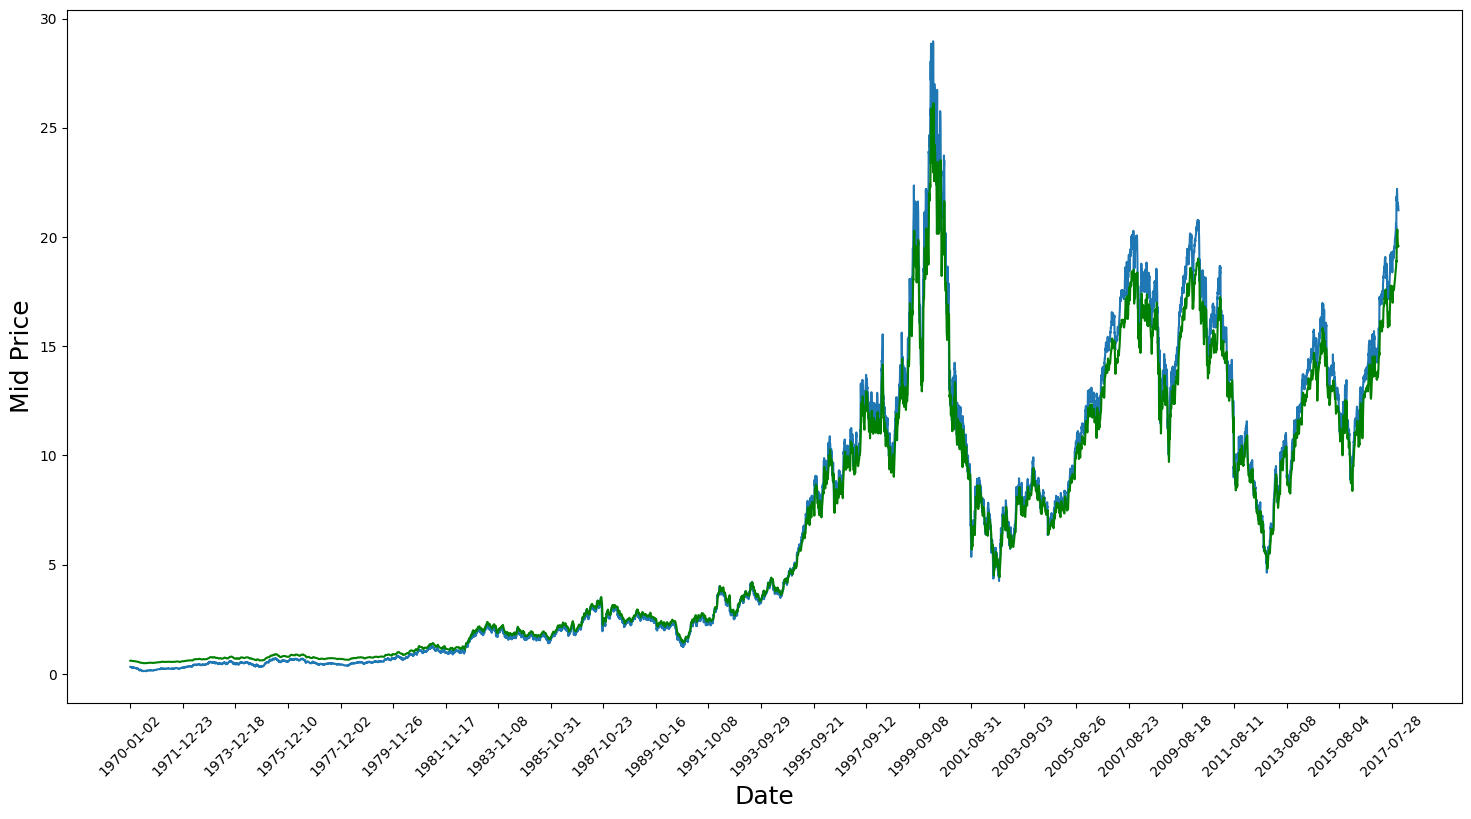

**************************************************************************************************************************************************************
            Estado carry No. 1
**************************************************************************************************************************************************************


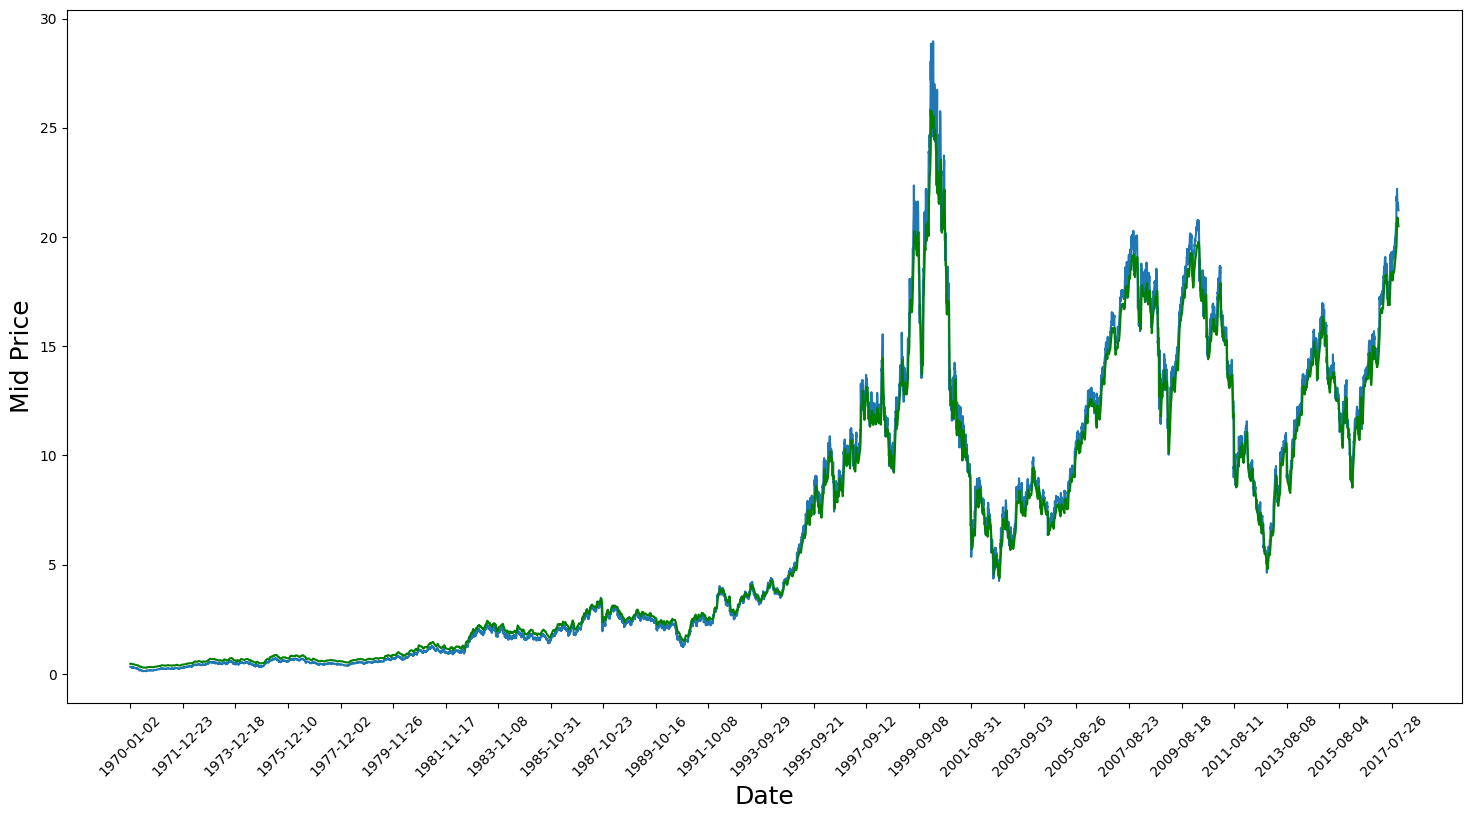

**************************************************************************************************************************************************************
            Estado carry No. 2
**************************************************************************************************************************************************************


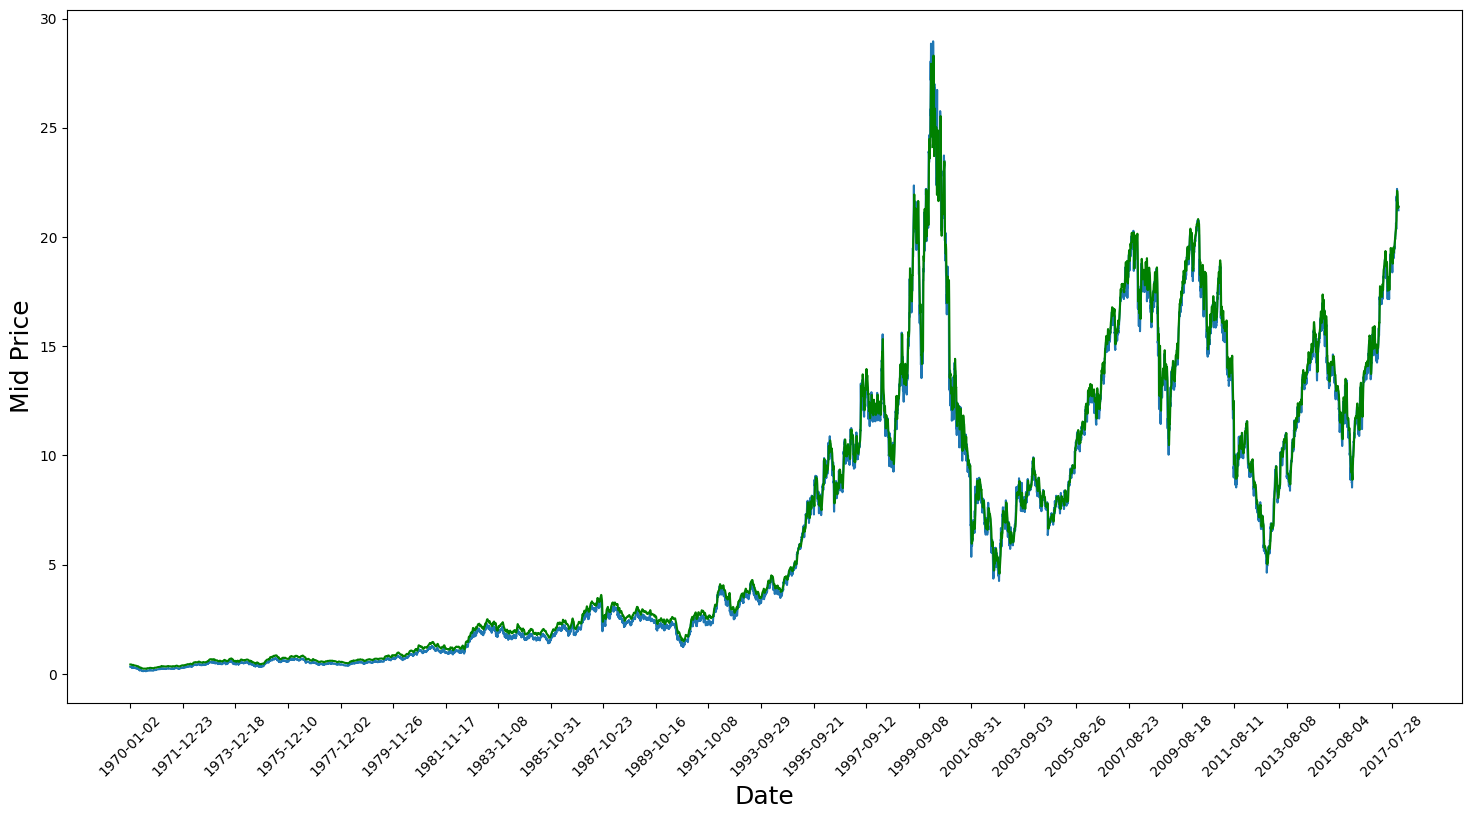

**************************************************************************************************************************************************************
            Estado carry No. 3
**************************************************************************************************************************************************************


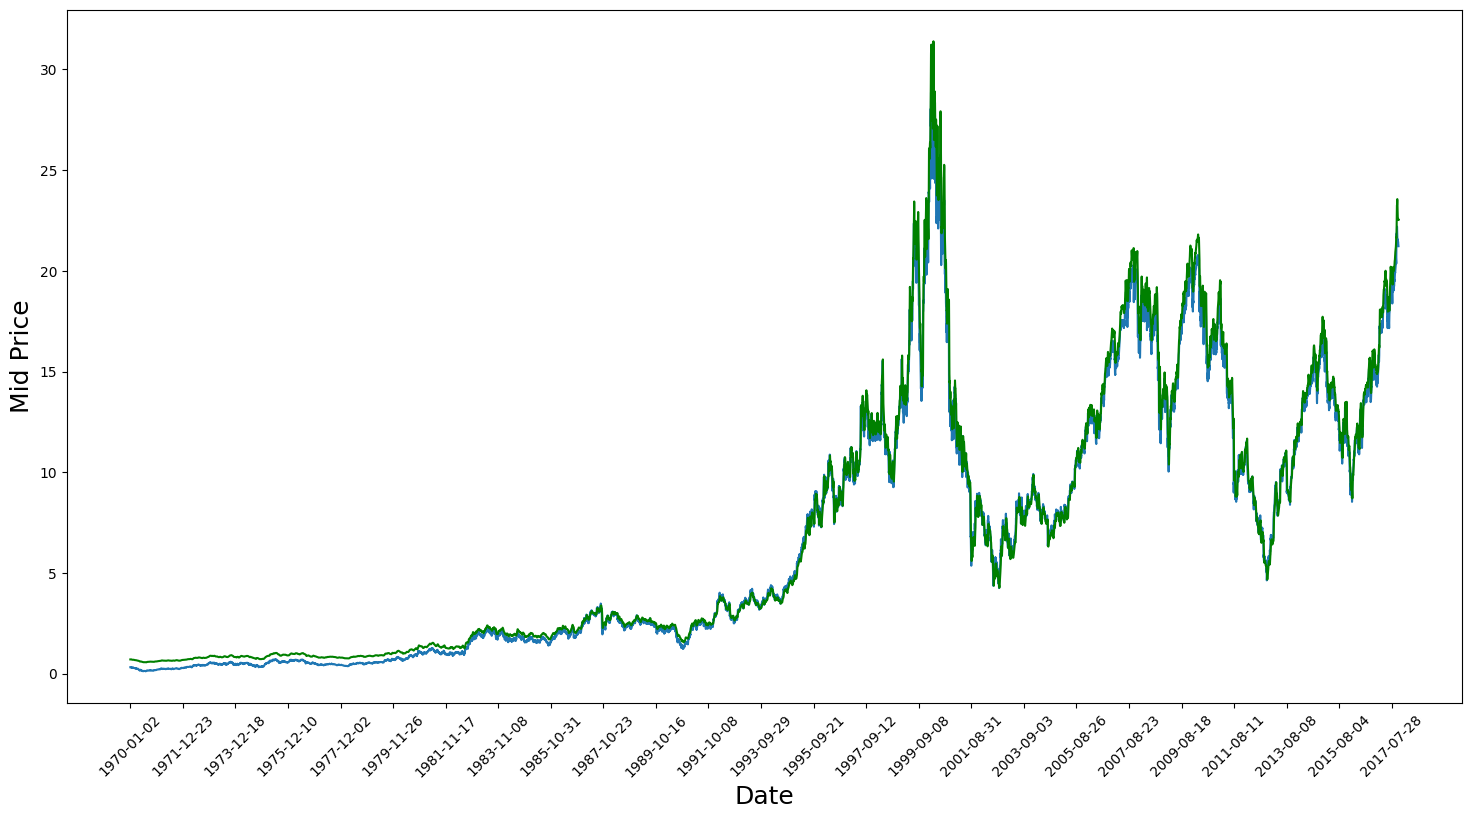

**************************************************************************************************************************************************************
            Estado carry No. 4
**************************************************************************************************************************************************************


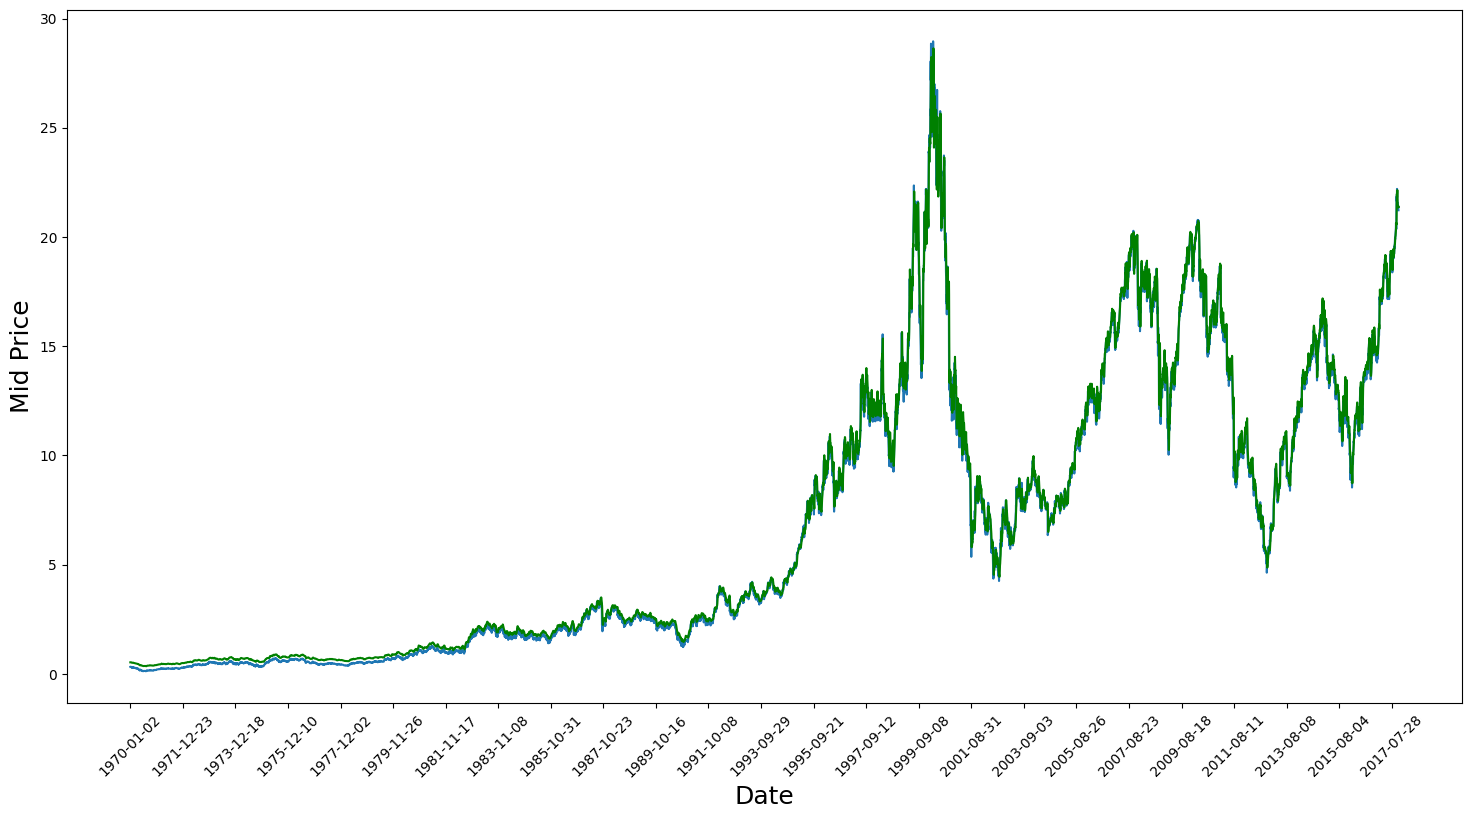

**************************************************************************************************************************************************************
            Estado carry No. 5
**************************************************************************************************************************************************************


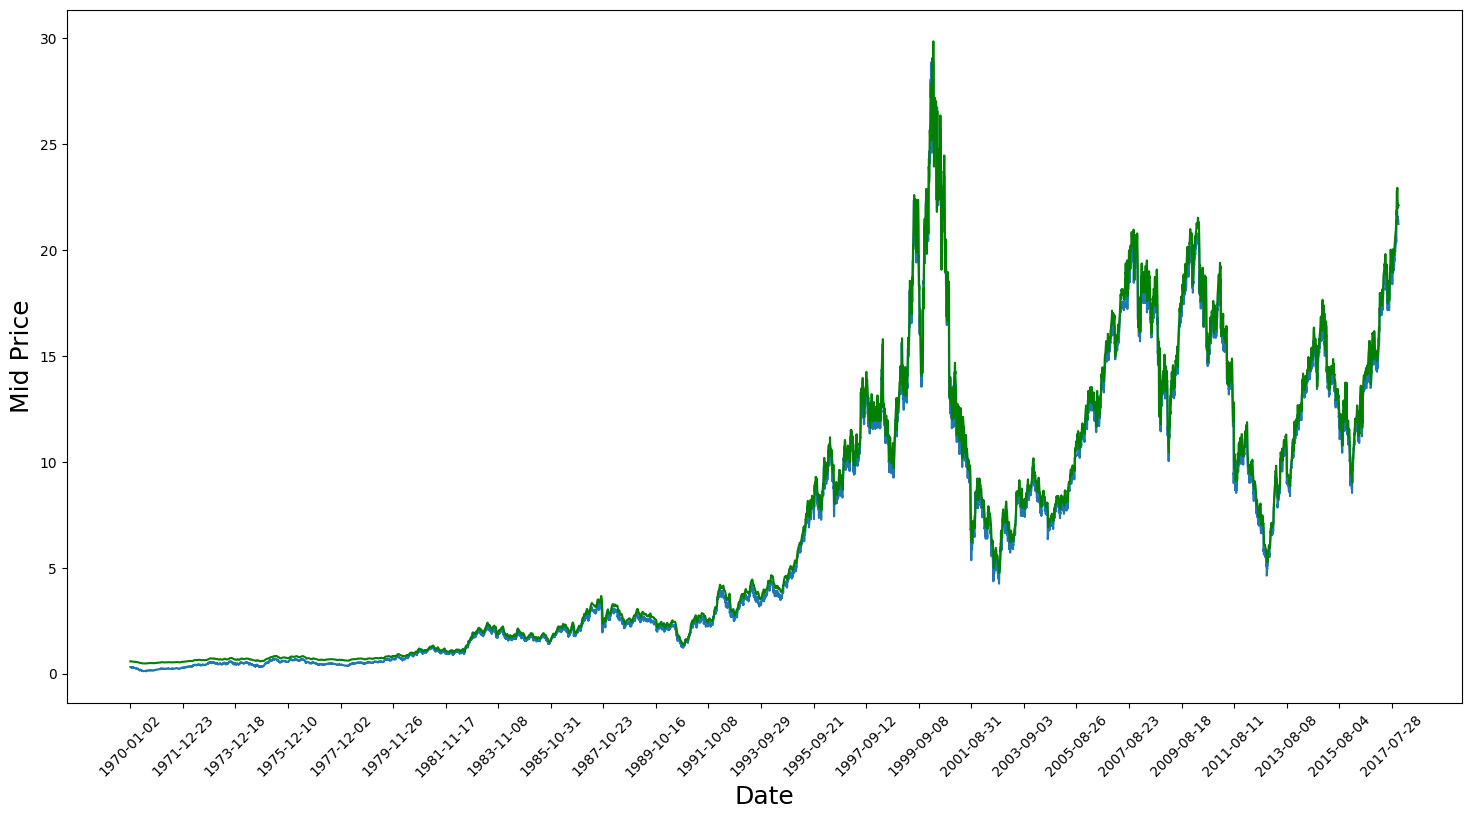

**************************************************************************************************************************************************************
            Estado carry No. 6
**************************************************************************************************************************************************************


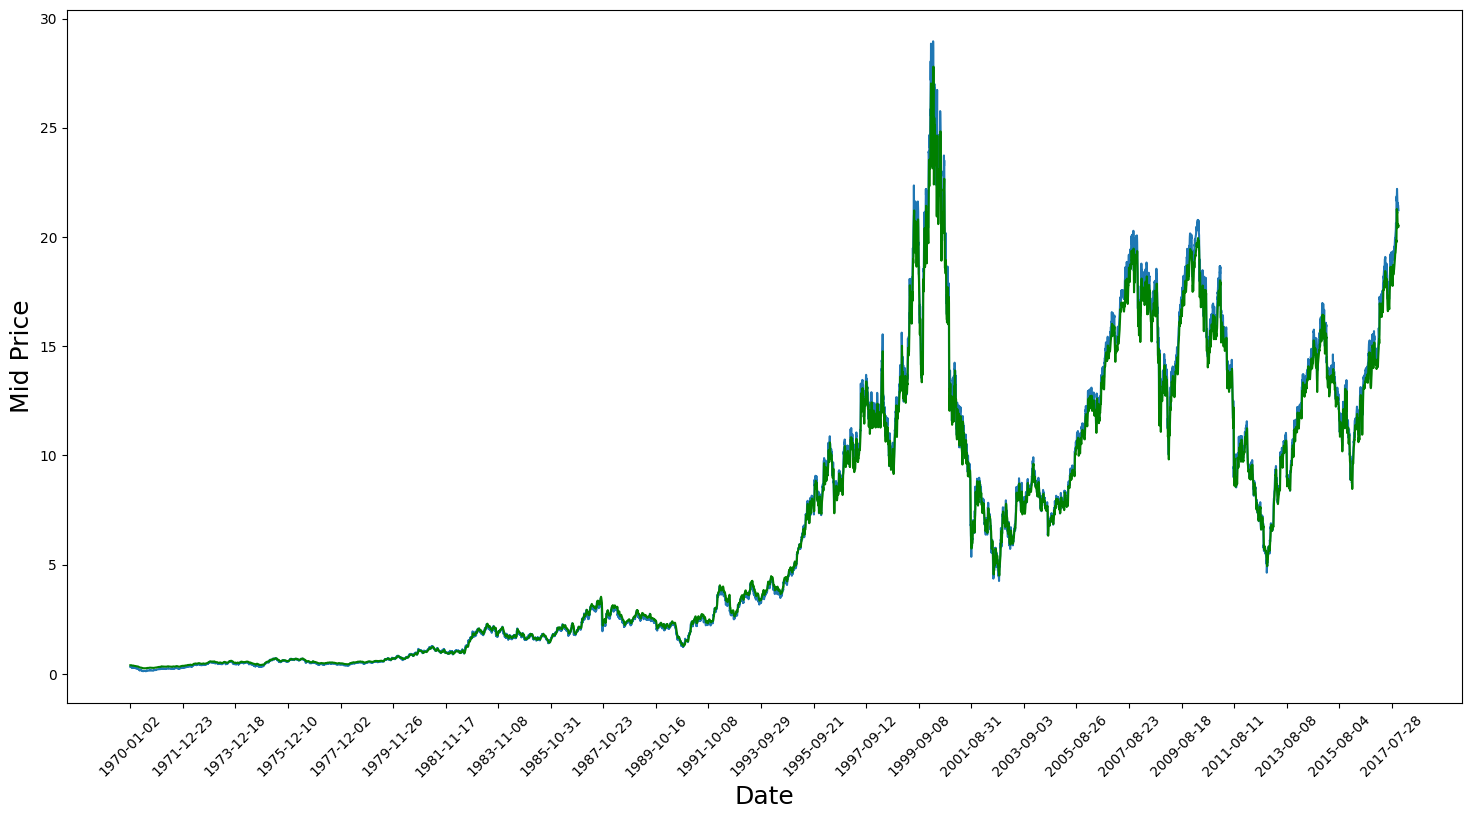

**************************************************************************************************************************************************************
            Estado carry No. 7
**************************************************************************************************************************************************************


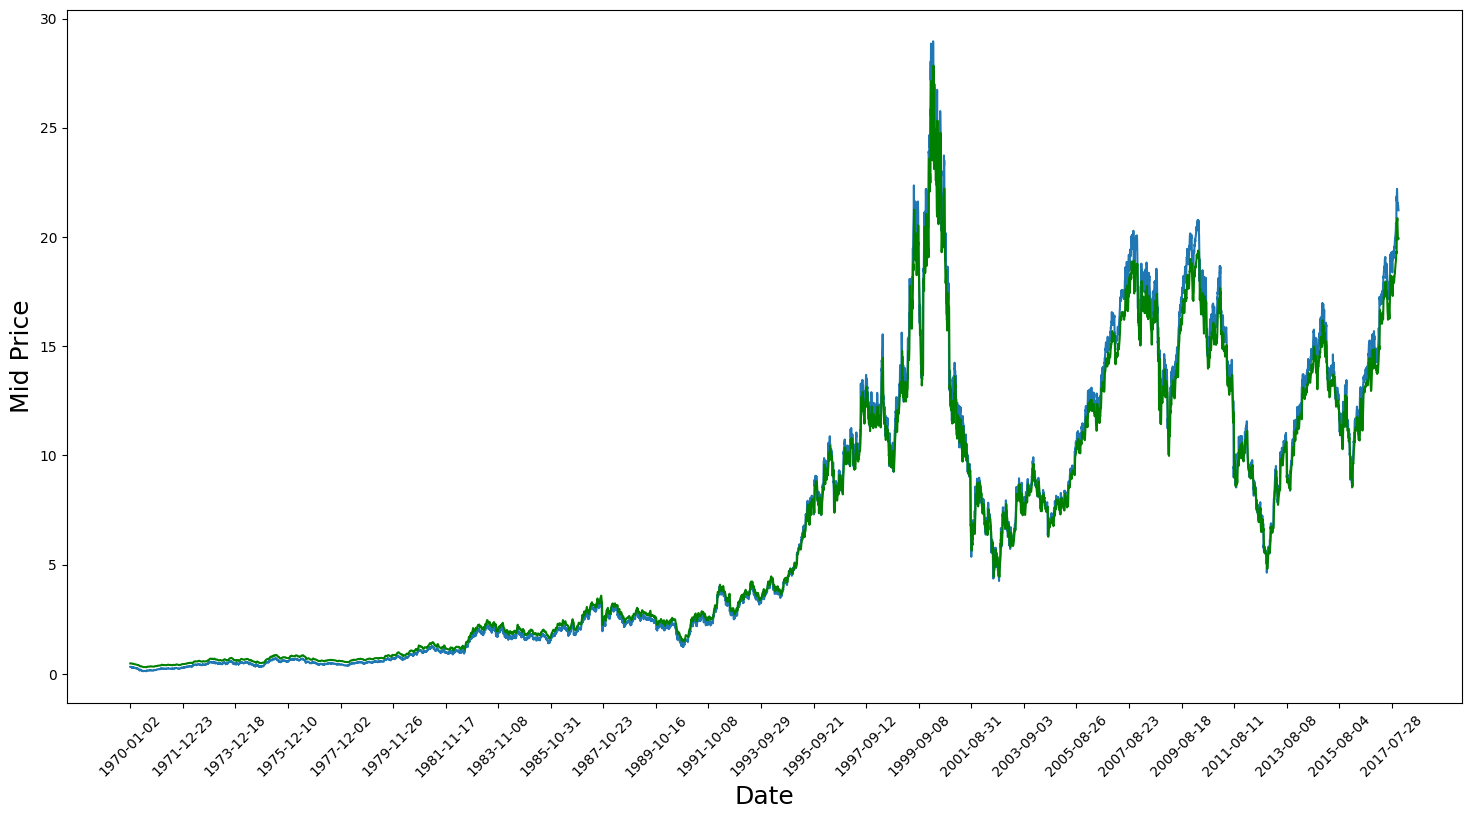

**************************************************************************************************************************************************************
            Estado carry No. 8
**************************************************************************************************************************************************************


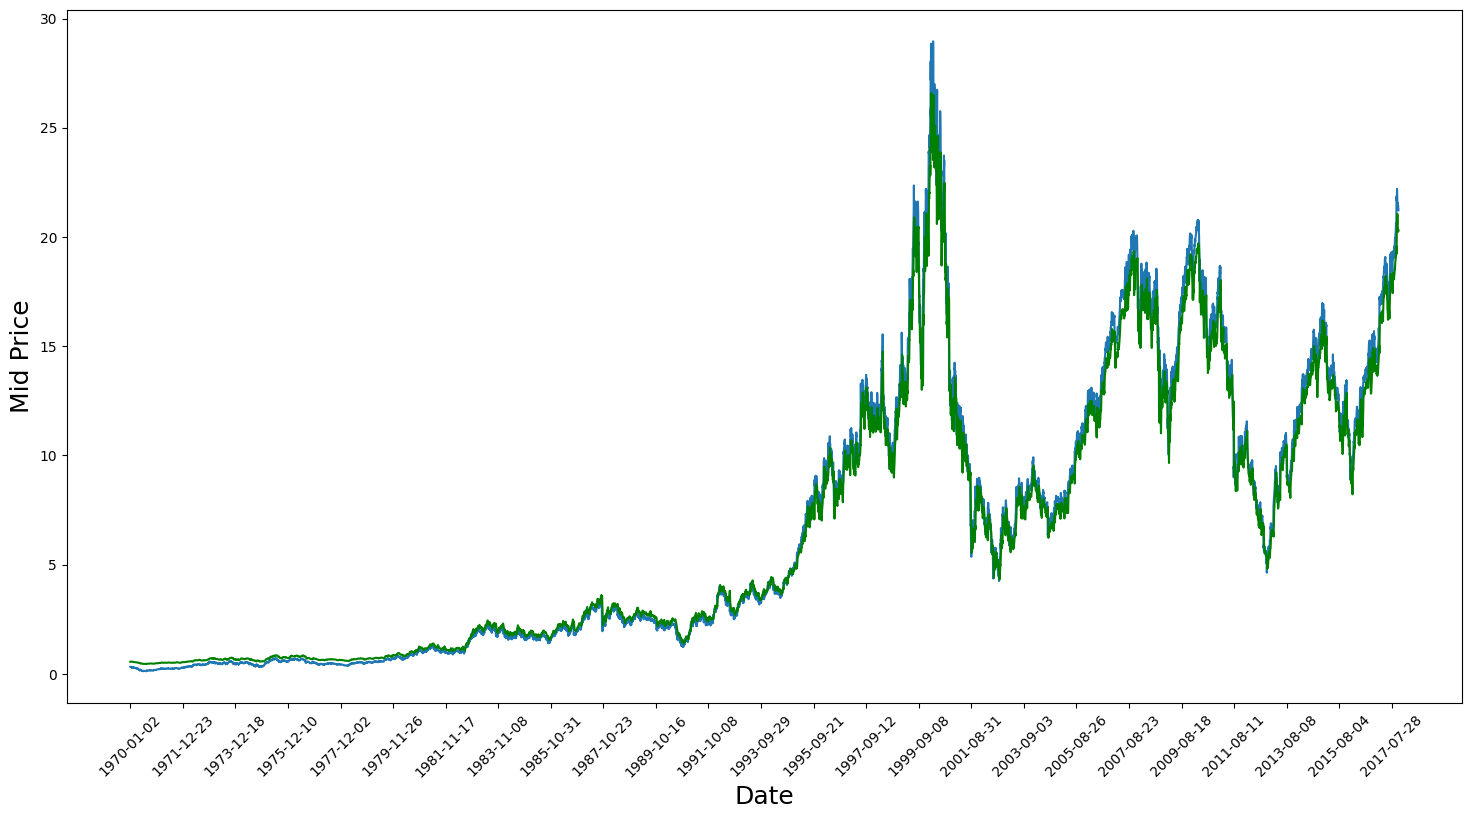

**************************************************************************************************************************************************************
            Estado carry No. 9
**************************************************************************************************************************************************************


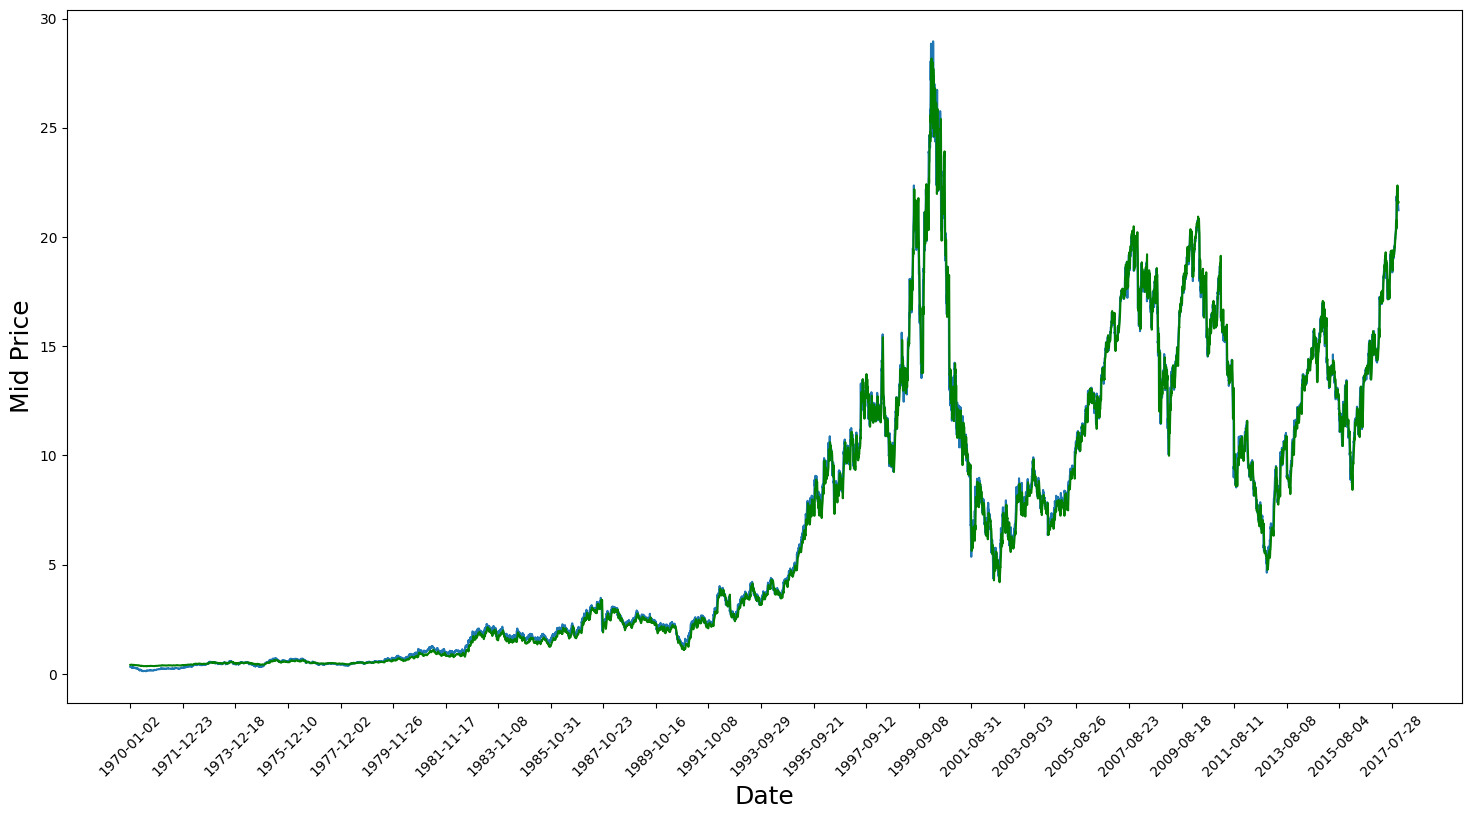

In [ ]:
i=0
while i<len(Salidas[2][0]):
  print("**************************************************************************************************************************************************************")
  print("            Estado carry No.", i)
  print("**************************************************************************************************************************************************************")
  proyecciones= []
  for s in Salidas[2]:
    proyecciones.append(s[i])

  plt.figure(figsize = (18,9))
  plt.plot(range(len(date[10:])),mid_prices[10:])
  plt.plot(range(len(date[10:])),proyecciones,color="green")
  plt.xticks(range(0,len(date),500),date[0::500],rotation=45)
  plt.xlabel('Date',fontsize=18)
  plt.ylabel('Mid Price',fontsize=18)
  plt.show()
  i+=1